In [330]:
import pandas as pd
import datetime
import numpy as np

In [313]:
pd.read_csv("Clean_Data/Clean_Agent_Not_Ready_2021.csv")

,Agent_ID,LOG_ON_DATE_TIME,REASON_CODE,DURATION
0,11,2021-01-04 07:47:00,Break[10003],24720
1,11,2021-01-04 07:47:00,Extended Wrap Up[10048],6180
2,11,2021-01-04 07:47:00,Go To Logout[10025],300
3,11,2021-01-04 07:47:00,Lunch[10001],215400
4,1,2021-01-04 08:27:00,Break[10003],14940
...,...,...,...,...
13938,16,2021-12-30 08:00:00,Break[10003],61920
13939,16,2021-12-30 08:00:00,Extended Wrap Up[10048],6660
13940,16,2021-12-30 08:00:00,Go To Logout[10025],120
13941,16,2021-12-30 08:00:00,Lunch[10001],1860


In [326]:
# read in agent csv
agent = pd.read_csv("Clean_Data/Clean_Agent_State_Summary_2021.csv")
agent.head(100)

,Agent_ID,Date,Hour,GROUP_NAME,CALLS_ANSWERED,RONA,LOGGED_ON_TIME,AVAILABLE_TIME,PER_AVAIL,HANDLED_CALLS_TIME,AVG_HANDLE_TIME,POD_NAME
0,8,2021-01-04,8,CN_SCH_SPECC_POD_1_SG,4,0,1728,864,0.5752,864,0,POD 1
1,8,2021-01-04,8,CN_SCH_SPECC_SP_POD_1_SG,0,0,1728,864,0.5752,0,0,POD 1
2,3,2021-01-04,8,CN_SCH_SPECC_EN_SG,3,0,1728,864,0.4008,864,0,POD 3
3,3,2021-01-04,8,CN_SCH_SPECC_SP_SG,1,0,1728,864,0.4008,0,0,POD 3
4,4,2021-01-04,8,CN_SCH_SPECC_POD_2_SG,4,0,1728,864,0.3640,864,0,POD 2
...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,2021-01-04,14,CN_SCH_SPECC_SP_SG,0,0,3456,864,0.1283,0,0,POD 3
96,8,2021-01-04,15,CN_SCH_SPECC_POD_1_SG,8,1,3456,1728,0.5578,1728,0,POD 1
97,8,2021-01-04,15,CN_SCH_SPECC_SP_POD_1_SG,0,0,3456,1728,0.5578,0,0,POD 1
98,14,2021-01-04,15,CN_SCH_SPECC_POD_2_SG,8,0,3456,1728,0.4019,1728,0,POD 2


In [316]:
agent.groupby("POD_NAME").mean()["AVG_HANDLE_TIME"]

POD_NAME
POD 1    19.213082
POD 2    17.455536
POD 3    48.192705
Name: AVG_HANDLE_TIME, dtype: float64

In [235]:
reasons = pd.read_csv("Clean_Data/reasons_code.csv")
reasons.head()

,Date,Agent_ID,Break[10003],Extended Wrap Up[10048],Go To Logout[10025],Lunch[10001],Undefined[0],CTI Failure[50002],Outbound Calls[32],RONA[32767],Administration[11043],Computer Issues[10030],Meeting[10007],[50003],Training[10005],[32762],[999],Member Facing Work[11494],Missed Tasks[50010]
0,1/4/21,11,8.4,2.1,0.1,73.3,16.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1/4/21,1,5.2,14.6,0.2,75.2,3.6,1.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1/4/21,2,34.7,NaN,0.3,57.0,0.8,NaN,7.0,0.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1/4/21,3,4.6,29.7,0.1,65.4,0.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1/4/21,4,8.7,45.5,0.1,74.9,0.2,NaN,15.9,0.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [236]:
reasons["Date"] = pd.to_datetime(reasons["Date"])

In [237]:
reasons

,Date,Agent_ID,Break[10003],Extended Wrap Up[10048],Go To Logout[10025],Lunch[10001],Undefined[0],CTI Failure[50002],Outbound Calls[32],RONA[32767],Administration[11043],Computer Issues[10030],Meeting[10007],[50003],Training[10005],[32762],[999],Member Facing Work[11494],Missed Tasks[50010]
0,2021-01-04,11,8.4,2.1,0.1,73.3,16.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-01-04,1,5.2,14.6,0.2,75.2,3.6,1.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-01-04,2,34.7,NaN,0.3,57.0,0.8,NaN,7.0,0.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-01-04,3,4.6,29.7,0.1,65.4,0.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-01-04,4,8.7,45.5,0.1,74.9,0.2,NaN,15.9,0.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3485,2021-12-23,16,9.8,5.6,0.1,81.8,2.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3486,2021-12-27,16,15.1,18.3,0.1,61.5,4.8,NaN,0.2,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3487,2021-12-28,16,20.1,8.9,0.1,64.9,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3488,2021-12-29,16,17.5,2.7,0.1,71.4,7.9,NaN,NaN,0.2,0.0,NaN,0.3,NaN,NaN,NaN,NaN,NaN,NaN


In [239]:
reasons.isnull().sum()

Date                            0
Agent_ID                        0
Break[10003]                  881
Extended Wrap Up[10048]       843
Go To Logout[10025]           697
Lunch[10001]                 1578
Undefined[0]                    3
CTI Failure[50002]           3416
Outbound Calls[32]           3118
RONA[32767]                  2496
Administration[11043]        2706
Computer Issues[10030]       3263
Meeting[10007]               3273
[50003]                      3053
Training[10005]              3320
[32762]                      3482
[999]                        3440
Member Facing Work[11494]    3429
Missed Tasks[50010]          3489
dtype: int64

In [245]:
reason_codes = reasons.drop(columns=["Date", "Agent_ID"]).columns.tolist()

In [271]:
reason_codes

['Break[10003]',
 'Extended Wrap Up[10048]',
 'Go To Logout[10025]',
 'Lunch[10001]',
 'Undefined[0]',
 'CTI Failure[50002]',
 'Outbound Calls[32]',
 'RONA[32767]',
 'Administration[11043]',
 'Computer Issues[10030]',
 'Meeting[10007]',
 '[50003]',
 'Training[10005]',
 '[32762]',
 '[999]',
 'Member Facing Work[11494]',
 'Missed Tasks[50010]']

In [ ]:
reason_codes.isnull().sum()

In [258]:
reason_codes_agents = pd.DataFrame()

In [298]:
dates = agent["Date"].unique()

agents = reasons["Agent_ID"].unique()

In [303]:
reasons.loc[(reasons["Date"] == x)]["Agent_ID"]

Series([], Name: Agent_ID, dtype: int64)

In [304]:
x

'Break[10003]'

In [305]:
for x in dates:
    for i in reasons.loc[(reasons["Date"] == x)]["Agent_ID"].unique().tolist():
        test = agent.loc[(agent["Agent_ID"] == i) & (agent["Date"] == x)]
        tester = reasons.loc[(reasons["Agent_ID"] == i) & (reasons["Date"] == x)]

        for z in reason_codes:
            test[z] = tester[z].tolist()[0]
            test = test.replace(np.nan, 0)
            reason_codes_agents = pd.concat([reason_codes_agents, test])


2021-01-04
11
2021-01-04
8.4
2021-01-04
2.1
2021-01-04
0.1
2021-01-04
73.3
2021-01-04
16.1
2021-01-04
nan
2021-01-04
nan
2021-01-04
nan
2021-01-04
nan
2021-01-04
nan
2021-01-04
nan
2021-01-04
nan
2021-01-04
nan
2021-01-04
nan
2021-01-04
nan
2021-01-04
nan
2021-01-04
nan
1
2021-01-04
5.2
2021-01-04
14.6
2021-01-04
0.2
2021-01-04
75.2
2021-01-04
3.6
2021-01-04
1.4
2021-01-04
nan
2021-01-04
nan
2021-01-04
nan
2021-01-04
nan


/Users/evanbruno/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


2021-01-04
nan
2021-01-04
nan
2021-01-04
nan
2021-01-04
nan
2021-01-04
nan
2021-01-04
nan
2021-01-04
nan
2
2021-01-04
34.7
2021-01-04
nan
2021-01-04
0.3
2021-01-04
57.0
2021-01-04
0.8
2021-01-04
nan
2021-01-04
7.0
2021-01-04
0.3
2021-01-04
nan
2021-01-04
nan
2021-01-04
nan
2021-01-04
nan
2021-01-04
nan
2021-01-04
nan
2021-01-04
nan
2021-01-04
nan
2021-01-04
nan
3
2021-01-04
4.6
2021-01-04
29.7
2021-01-04
0.1
2021-01-04
65.4
2021-01-04
0.2
2021-01-04
nan
2021-01-04
nan
2021-01-04
nan
2021-01-04
nan
2021-01-04
nan
2021-01-04
nan
2021-01-04
nan
2021-01-04
nan
2021-01-04
nan
2021-01-04
nan
2021-01-04
nan
2021-01-04
nan
4
2021-01-04
8.7
2021-01-04
45.5
2021-01-04
0.1
2021-01-04
74.9
2021-01-04
0.2
2021-01-04
nan
2021-01-04
15.9
2021-01-04
0.3
2021-01-04
nan
2021-01-04
nan
2021-01-04
nan
2021-01-04
nan
2021-01-04
nan
2021-01-04
nan
2021-01-04
nan
2021-01-04
nan
2021-01-04
nan
8
2021-01-04
3.7
2021-01-04
11.9
2021-01-04
0.2
2021-01-04
83.9
2021-01-04
0.2
2021-01-04
nan
2021-01-04
nan
2021-01-

2021-01-07
0.2
2021-01-07
nan
2021-01-07
nan
2021-01-07
nan
2021-01-07
nan
2021-01-07
nan
2021-01-07
nan
2021-01-07
nan
2021-01-07
nan
2021-01-07
nan
2021-01-07
nan
2021-01-07
nan
2021-01-07
nan
14
2021-01-07
nan
2021-01-07
97.7
2021-01-07
0.9
2021-01-07
nan
2021-01-07
0.9
2021-01-07
nan
2021-01-07
nan
2021-01-07
0.5
2021-01-07
nan
2021-01-07
nan
2021-01-07
nan
2021-01-07
nan
2021-01-07
nan
2021-01-07
nan
2021-01-07
nan
2021-01-07
nan
2021-01-07
nan
2021-01-08
4
2021-01-08
13.9
2021-01-08
nan
2021-01-08
0.1
2021-01-08
68.8
2021-01-08
17.1
2021-01-08
nan
2021-01-08
nan
2021-01-08
0.1
2021-01-08
27.5
2021-01-08
nan
2021-01-08
nan
2021-01-08
nan
2021-01-08
nan
2021-01-08
nan
2021-01-08
nan
2021-01-08
nan
2021-01-08
nan
1
2021-01-08
12.0
2021-01-08
11.6
2021-01-08
0.1
2021-01-08
70.8
2021-01-08
5.5
2021-01-08
nan
2021-01-08
nan
2021-01-08
nan
2021-01-08
nan
2021-01-08
nan
2021-01-08
nan
2021-01-08
nan
2021-01-08
nan
2021-01-08
nan
2021-01-08
nan
2021-01-08
nan
2021-01-08
nan
2
2021-01-08
3

2021-01-13
nan
2021-01-13
nan
2021-01-13
nan
2021-01-13
nan
12
2021-01-13
18.0
2021-01-13
21.4
2021-01-13
0.1
2021-01-13
60.4
2021-01-13
0.1
2021-01-13
nan
2021-01-13
nan
2021-01-13
0.1
2021-01-13
nan
2021-01-13
nan
2021-01-13
nan
2021-01-13
nan
2021-01-13
nan
2021-01-13
nan
2021-01-13
nan
2021-01-13
nan
2021-01-13
nan
11
2021-01-13
10.7
2021-01-13
nan
2021-01-13
0.0
2021-01-13
50.2
2021-01-13
15.0
2021-01-13
nan
2021-01-13
nan
2021-01-13
nan
2021-01-13
24.2
2021-01-13
nan
2021-01-13
nan
2021-01-13
nan
2021-01-13
nan
2021-01-13
nan
2021-01-13
nan
2021-01-13
nan
2021-01-13
nan
16
2021-01-13
20.9
2021-01-13
9.2
2021-01-13
0.1
2021-01-13
64.1
2021-01-13
5.8
2021-01-13
nan
2021-01-13
nan
2021-01-13
nan
2021-01-13
nan
2021-01-13
nan
2021-01-13
nan
2021-01-13
nan
2021-01-13
nan
2021-01-13
nan
2021-01-13
nan
2021-01-13
nan
2021-01-13
nan
1
2021-01-13
16.1
2021-01-13
1.2
2021-01-13
0.1
2021-01-13
79.8
2021-01-13
2.7
2021-01-13
nan
2021-01-13
nan
2021-01-13
nan
2021-01-13
0.0
2021-01-13
nan
202

2021-01-15
23.6
2021-01-15
nan
2021-01-15
nan
2021-01-15
nan
2021-01-15
nan
2021-01-15
nan
2021-01-15
nan
2021-01-15
nan
2021-01-15
nan
2021-01-15
nan
7
2021-01-15
nan
2021-01-15
34.5
2021-01-15
0.1
2021-01-15
65.4
2021-01-15
0.1
2021-01-15
nan
2021-01-15
nan
2021-01-15
nan
2021-01-15
nan
2021-01-15
nan
2021-01-15
nan
2021-01-15
nan
2021-01-15
nan
2021-01-15
nan
2021-01-15
nan
2021-01-15
nan
2021-01-15
nan
6
2021-01-15
7.8
2021-01-15
31.8
2021-01-15
0.1
2021-01-15
60.1
2021-01-15
0.2
2021-01-15
nan
2021-01-15
nan
2021-01-15
nan
2021-01-15
nan
2021-01-15
nan
2021-01-15
nan
2021-01-15
nan
2021-01-15
nan
2021-01-15
nan
2021-01-15
nan
2021-01-15
nan
2021-01-15
nan
18
2021-01-15
79.8
2021-01-15
19.3
2021-01-15
0.4
2021-01-15
nan
2021-01-15
0.4
2021-01-15
nan
2021-01-15
nan
2021-01-15
nan
2021-01-15
nan
2021-01-15
nan
2021-01-15
nan
2021-01-15
nan
2021-01-15
nan
2021-01-15
nan
2021-01-15
nan
2021-01-15
nan
2021-01-15
nan
5
2021-01-15
13.9
2021-01-15
28.7
2021-01-15
0.1
2021-01-15
56.9
2021-0

2021-01-21
nan
13
2021-01-21
17.8
2021-01-21
13.1
2021-01-21
0.1
2021-01-21
67.2
2021-01-21
1.7
2021-01-21
nan
2021-01-21
nan
2021-01-21
0.1
2021-01-21
nan
2021-01-21
nan
2021-01-21
nan
2021-01-21
nan
2021-01-21
nan
2021-01-21
nan
2021-01-21
nan
2021-01-21
nan
2021-01-21
nan
6
2021-01-21
11.4
2021-01-21
32.3
2021-01-21
0.0
2021-01-21
55.4
2021-01-21
0.9
2021-01-21
nan
2021-01-21
nan
2021-01-21
nan
2021-01-21
nan
2021-01-21
nan
2021-01-21
nan
2021-01-21
nan
2021-01-21
nan
2021-01-21
nan
2021-01-21
nan
2021-01-21
nan
2021-01-21
nan
4
2021-01-21
nan
2021-01-21
nan
2021-01-21
0.1
2021-01-21
98.6
2021-01-21
0.5
2021-01-21
nan
2021-01-21
nan
2021-01-21
0.7
2021-01-21
nan
2021-01-21
nan
2021-01-21
nan
2021-01-21
nan
2021-01-21
nan
2021-01-21
nan
2021-01-21
nan
2021-01-21
nan
2021-01-21
nan
5
2021-01-21
9.5
2021-01-21
24.4
2021-01-21
0.1
2021-01-21
65.9
2021-01-21
0.1
2021-01-21
nan
2021-01-21
nan
2021-01-21
nan
2021-01-21
nan
2021-01-21
nan
2021-01-21
nan
2021-01-21
nan
2021-01-21
nan
2021-01

2021-01-26
0.0
2021-01-26
35.3
2021-01-26
0.1
2021-01-26
nan
2021-01-26
nan
2021-01-26
nan
2021-01-26
nan
2021-01-26
nan
2021-01-26
46.2
2021-01-26
nan
2021-01-26
nan
2021-01-26
nan
2021-01-26
nan
2021-01-26
nan
2021-01-26
nan
13
2021-01-26
37.2
2021-01-26
3.7
2021-01-26
0.1
2021-01-26
57.5
2021-01-26
1.0
2021-01-26
nan
2021-01-26
nan
2021-01-26
0.1
2021-01-26
0.5
2021-01-26
nan
2021-01-26
nan
2021-01-26
nan
2021-01-26
nan
2021-01-26
nan
2021-01-26
nan
2021-01-26
nan
2021-01-26
nan
6
2021-01-26
10.8
2021-01-26
11.2
2021-01-26
0.0
2021-01-26
32.0
2021-01-26
0.1
2021-01-26
nan
2021-01-26
nan
2021-01-26
nan
2021-01-26
45.8
2021-01-26
nan
2021-01-26
nan
2021-01-26
nan
2021-01-26
nan
2021-01-26
nan
2021-01-26
nan
2021-01-26
nan
2021-01-26
nan
18
2021-01-26
42.0
2021-01-26
57.5
2021-01-26
0.1
2021-01-26
nan
2021-01-26
0.4
2021-01-26
nan
2021-01-26
nan
2021-01-26
nan
2021-01-26
nan
2021-01-26
nan
2021-01-26
nan
2021-01-26
nan
2021-01-26
nan
2021-01-26
nan
2021-01-26
nan
2021-01-26
nan
2021-01

2021-01-29
0.1
2021-01-29
58.8
2021-01-29
2.5
2021-01-29
nan
2021-01-29
nan
2021-01-29
nan
2021-01-29
27.8
2021-01-29
nan
2021-01-29
nan
2021-01-29
nan
2021-01-29
nan
2021-01-29
nan
2021-01-29
nan
2021-01-29
nan
2021-01-29
nan
5
2021-01-29
14.9
2021-01-29
18.8
2021-01-29
0.1
2021-01-29
65.7
2021-01-29
0.6
2021-01-29
nan
2021-01-29
nan
2021-01-29
0.0
2021-01-29
0.0
2021-01-29
nan
2021-01-29
nan
2021-01-29
nan
2021-01-29
nan
2021-01-29
nan
2021-01-29
nan
2021-01-29
nan
2021-01-29
nan
14
2021-01-29
10.7
2021-01-29
88.8
2021-01-29
0.4
2021-01-29
nan
2021-01-29
0.2
2021-01-29
nan
2021-01-29
nan
2021-01-29
nan
2021-01-29
nan
2021-01-29
nan
2021-01-29
nan
2021-01-29
nan
2021-01-29
nan
2021-01-29
nan
2021-01-29
nan
2021-01-29
nan
2021-01-29
nan
18
2021-01-29
89.8
2021-01-29
9.4
2021-01-29
0.5
2021-01-29
nan
2021-01-29
0.3
2021-01-29
nan
2021-01-29
nan
2021-01-29
nan
2021-01-29
nan
2021-01-29
nan
2021-01-29
nan
2021-01-29
nan
2021-01-29
nan
2021-01-29
nan
2021-01-29
nan
2021-01-29
nan
2021-01-2

2021-02-03
nan
2021-02-03
nan
2021-02-03
nan
18
2021-02-03
28.9
2021-02-03
12.4
2021-02-03
0.2
2021-02-03
nan
2021-02-03
0.2
2021-02-03
nan
2021-02-03
nan
2021-02-03
nan
2021-02-03
nan
2021-02-03
nan
2021-02-03
58.3
2021-02-03
nan
2021-02-03
nan
2021-02-03
nan
2021-02-03
nan
2021-02-03
nan
2021-02-03
nan
5
2021-02-03
19.1
2021-02-03
9.9
2021-02-03
0.1
2021-02-03
70.2
2021-02-03
0.7
2021-02-03
nan
2021-02-03
nan
2021-02-03
0.1
2021-02-03
nan
2021-02-03
nan
2021-02-03
nan
2021-02-03
nan
2021-02-03
nan
2021-02-03
nan
2021-02-03
nan
2021-02-03
nan
2021-02-03
nan
14
2021-02-03
25.4
2021-02-03
73.2
2021-02-03
0.8
2021-02-03
nan
2021-02-03
0.6
2021-02-03
nan
2021-02-03
nan
2021-02-03
nan
2021-02-03
nan
2021-02-03
nan
2021-02-03
nan
2021-02-03
nan
2021-02-03
nan
2021-02-03
nan
2021-02-03
nan
2021-02-03
nan
2021-02-03
nan
2021-02-04
11
2021-02-04
7.0
2021-02-04
3.8
2021-02-04
1.0
2021-02-04
46.4
2021-02-04
8.5
2021-02-04
nan
2021-02-04
nan
2021-02-04
nan
2021-02-04
33.3
2021-02-04
nan
2021-02-0

2021-02-08
nan
2021-02-08
nan
2021-02-08
nan
2021-02-08
nan
2021-02-08
nan
2021-02-08
13.1
2021-02-08
nan
2021-02-08
nan
2021-02-08
nan
2021-02-08
nan
2021-02-08
nan
2021-02-08
nan
18
2021-02-08
nan
2021-02-08
99.2
2021-02-08
0.2
2021-02-08
nan
2021-02-08
0.6
2021-02-08
nan
2021-02-08
nan
2021-02-08
nan
2021-02-08
nan
2021-02-08
nan
2021-02-08
nan
2021-02-08
nan
2021-02-08
nan
2021-02-08
nan
2021-02-08
nan
2021-02-08
nan
2021-02-08
nan
6
2021-02-08
nan
2021-02-08
nan
2021-02-08
27.3
2021-02-08
nan
2021-02-08
72.7
2021-02-08
nan
2021-02-08
nan
2021-02-08
nan
2021-02-08
nan
2021-02-08
nan
2021-02-08
nan
2021-02-08
nan
2021-02-08
nan
2021-02-08
nan
2021-02-08
nan
2021-02-08
nan
2021-02-08
nan
14
2021-02-08
7.9
2021-02-08
99.4
2021-02-08
0.4
2021-02-08
58.5
2021-02-08
0.2
2021-02-08
nan
2021-02-08
nan
2021-02-08
nan
2021-02-08
11.3
2021-02-08
nan
2021-02-08
nan
2021-02-08
nan
2021-02-08
nan
2021-02-08
nan
2021-02-08
nan
2021-02-08
nan
2021-02-08
nan
7
2021-02-08
14.9
2021-02-08
11.5
2021-0

2021-02-12
2.2
2021-02-12
0.1
2021-02-12
32.6
2021-02-12
3.4
2021-02-12
nan
2021-02-12
nan
2021-02-12
nan
2021-02-12
nan
2021-02-12
nan
2021-02-12
53.9
2021-02-12
nan
2021-02-12
nan
2021-02-12
nan
2021-02-12
nan
2021-02-12
nan
2021-02-12
nan
3
2021-02-12
9.3
2021-02-12
19.2
2021-02-12
0.1
2021-02-12
70.9
2021-02-12
0.6
2021-02-12
nan
2021-02-12
nan
2021-02-12
nan
2021-02-12
nan
2021-02-12
nan
2021-02-12
nan
2021-02-12
nan
2021-02-12
nan
2021-02-12
nan
2021-02-12
nan
2021-02-12
nan
2021-02-12
nan
6
2021-02-12
5.3
2021-02-12
11.5
2021-02-12
0.0
2021-02-12
29.2
2021-02-12
0.1
2021-02-12
nan
2021-02-12
nan
2021-02-12
nan
2021-02-12
53.8
2021-02-12
nan
2021-02-12
nan
2021-02-12
nan
2021-02-12
nan
2021-02-12
0.0
2021-02-12
nan
2021-02-12
nan
2021-02-12
nan
13
2021-02-12
9.2
2021-02-12
19.1
2021-02-12
2.7
2021-02-12
64.2
2021-02-12
1.0
2021-02-12
nan
2021-02-12
nan
2021-02-12
3.8
2021-02-12
nan
2021-02-12
nan
2021-02-12
nan
2021-02-12
nan
2021-02-12
nan
2021-02-12
nan
2021-02-12
nan
2021-02-1

2021-02-18
nan
18
2021-02-18
67.2
2021-02-18
32.3
2021-02-18
0.2
2021-02-18
nan
2021-02-18
0.3
2021-02-18
nan
2021-02-18
nan
2021-02-18
nan
2021-02-18
nan
2021-02-18
nan
2021-02-18
nan
2021-02-18
nan
2021-02-18
nan
2021-02-18
nan
2021-02-18
nan
2021-02-18
nan
2021-02-18
nan
5
2021-02-18
15.2
2021-02-18
16.6
2021-02-18
0.1
2021-02-18
67.9
2021-02-18
0.2
2021-02-18
nan
2021-02-18
nan
2021-02-18
nan
2021-02-18
nan
2021-02-18
nan
2021-02-18
nan
2021-02-18
nan
2021-02-18
nan
2021-02-18
nan
2021-02-18
nan
2021-02-18
nan
2021-02-18
nan
14
2021-02-18
nan
2021-02-18
96.3
2021-02-18
2.2
2021-02-18
nan
2021-02-18
1.5
2021-02-18
nan
2021-02-18
nan
2021-02-18
nan
2021-02-18
nan
2021-02-18
nan
2021-02-18
nan
2021-02-18
nan
2021-02-18
nan
2021-02-18
nan
2021-02-18
nan
2021-02-18
nan
2021-02-18
nan
2021-02-19
16
2021-02-19
nan
2021-02-19
nan
2021-02-19
nan
2021-02-19
nan
2021-02-19
0.4
2021-02-19
99.6
2021-02-19
nan
2021-02-19
nan
2021-02-19
nan
2021-02-19
nan
2021-02-19
nan
2021-02-19
nan
2021-02-19


2021-02-23
nan
2021-02-23
nan
2021-02-23
nan
2021-02-23
nan
2021-02-23
nan
2021-02-23
nan
2021-02-23
nan
2021-02-23
nan
5
2021-02-23
14.2
2021-02-23
19.4
2021-02-23
0.1
2021-02-23
61.4
2021-02-23
4.9
2021-02-23
nan
2021-02-23
nan
2021-02-23
0.0
2021-02-23
nan
2021-02-23
nan
2021-02-23
nan
2021-02-23
nan
2021-02-23
nan
2021-02-23
nan
2021-02-23
nan
2021-02-23
nan
2021-02-23
nan
18
2021-02-23
36.8
2021-02-23
62.8
2021-02-23
0.2
2021-02-23
nan
2021-02-23
0.2
2021-02-23
nan
2021-02-23
nan
2021-02-23
nan
2021-02-23
nan
2021-02-23
nan
2021-02-23
nan
2021-02-23
nan
2021-02-23
nan
2021-02-23
nan
2021-02-23
nan
2021-02-23
nan
2021-02-23
nan
14
2021-02-23
nan
2021-02-23
98.2
2021-02-23
1.1
2021-02-23
nan
2021-02-23
0.7
2021-02-23
nan
2021-02-23
nan
2021-02-23
nan
2021-02-23
nan
2021-02-23
nan
2021-02-23
nan
2021-02-23
nan
2021-02-23
nan
2021-02-23
nan
2021-02-23
nan
2021-02-23
nan
2021-02-23
nan
2021-02-24
4
2021-02-24
4.0
2021-02-24
nan
2021-02-24
0.1
2021-02-24
40.7
2021-02-24
9.6
2021-02-24
n

2021-02-26
54.1
2021-02-26
2.7
2021-02-26
nan
2021-02-26
0.3
2021-02-26
nan
2021-02-26
nan
2021-02-26
nan
2021-02-26
nan
2021-02-26
nan
2021-02-26
nan
2021-02-26
nan
2021-02-26
nan
2021-02-26
nan
2021-02-26
nan
2021-02-26
nan
2021-02-26
nan
5
2021-02-26
10.3
2021-02-26
4.1
2021-02-26
0.0
2021-02-26
35.7
2021-02-26
0.4
2021-02-26
nan
2021-02-26
nan
2021-02-26
0.0
2021-02-26
nan
2021-02-26
nan
2021-02-26
49.5
2021-02-26
nan
2021-02-26
nan
2021-02-26
nan
2021-02-26
nan
2021-02-26
nan
2021-02-26
nan
13
2021-02-26
29.9
2021-02-26
5.1
2021-02-26
0.1
2021-02-26
61.4
2021-02-26
0.1
2021-02-26
nan
2021-02-26
nan
2021-02-26
nan
2021-02-26
3.5
2021-02-26
nan
2021-02-26
nan
2021-02-26
nan
2021-02-26
nan
2021-02-26
nan
2021-02-26
nan
2021-02-26
nan
2021-02-26
nan
2021-03-01
11
2021-03-01
13.4
2021-03-01
nan
2021-03-01
0.4
2021-03-01
79.6
2021-03-01
5.7
2021-03-01
nan
2021-03-01
nan
2021-03-01
nan
2021-03-01
0.9
2021-03-01
nan
2021-03-01
nan
2021-03-01
nan
2021-03-01
nan
2021-03-01
nan
2021-03-01
na

nan
2021-03-03
nan
2021-03-03
nan
2021-03-03
nan
2021-03-03
nan
2021-03-03
nan
4
2021-03-03
0.4
2021-03-03
nan
2021-03-03
0.1
2021-03-03
91.9
2021-03-03
0.1
2021-03-03
nan
2021-03-03
7.0
2021-03-03
0.6
2021-03-03
nan
2021-03-03
nan
2021-03-03
nan
2021-03-03
nan
2021-03-03
nan
2021-03-03
nan
2021-03-03
nan
2021-03-03
nan
2021-03-03
nan
18
2021-03-03
37.6
2021-03-03
61.7
2021-03-03
0.3
2021-03-03
nan
2021-03-03
0.4
2021-03-03
nan
2021-03-03
nan
2021-03-03
nan
2021-03-03
nan
2021-03-03
nan
2021-03-03
nan
2021-03-03
nan
2021-03-03
nan
2021-03-03
nan
2021-03-03
nan
2021-03-03
nan
2021-03-03
nan
5
2021-03-03
16.8
2021-03-03
17.9
2021-03-03
0.1
2021-03-03
65.0
2021-03-03
0.3
2021-03-03
nan
2021-03-03
nan
2021-03-03
0.1
2021-03-03
nan
2021-03-03
nan
2021-03-03
nan
2021-03-03
nan
2021-03-03
nan
2021-03-03
nan
2021-03-03
nan
2021-03-03
nan
2021-03-03
nan
14
2021-03-03
27.6
2021-03-03
71.3
2021-03-03
0.6
2021-03-03
nan
2021-03-03
0.6
2021-03-03
nan
2021-03-03
nan
2021-03-03
nan
2021-03-03
nan
202

2021-03-08
76.3
2021-03-08
5.8
2021-03-08
nan
2021-03-08
nan
2021-03-08
nan
2021-03-08
nan
2021-03-08
nan
2021-03-08
nan
2021-03-08
nan
2021-03-08
nan
2021-03-08
nan
2021-03-08
nan
2021-03-08
nan
2021-03-08
nan
13
2021-03-08
19.3
2021-03-08
9.8
2021-03-08
0.1
2021-03-08
67.2
2021-03-08
3.6
2021-03-08
nan
2021-03-08
nan
2021-03-08
nan
2021-03-08
nan
2021-03-08
nan
2021-03-08
nan
2021-03-08
nan
2021-03-08
nan
2021-03-08
nan
2021-03-08
nan
2021-03-08
nan
2021-03-08
nan
8
2021-03-08
4.0
2021-03-08
4.1
2021-03-08
0.1
2021-03-08
89.2
2021-03-08
2.7
2021-03-08
nan
2021-03-08
nan
2021-03-08
nan
2021-03-08
nan
2021-03-08
nan
2021-03-08
nan
2021-03-08
nan
2021-03-08
nan
2021-03-08
nan
2021-03-08
nan
2021-03-08
nan
2021-03-08
nan
16
2021-03-08
21.2
2021-03-08
7.9
2021-03-08
0.1
2021-03-08
69.5
2021-03-08
1.2
2021-03-08
nan
2021-03-08
nan
2021-03-08
nan
2021-03-08
nan
2021-03-08
nan
2021-03-08
nan
2021-03-08
nan
2021-03-08
0.2
2021-03-08
nan
2021-03-08
nan
2021-03-08
nan
2021-03-08
nan
3
2021-03-0

2021-03-11
3.3
2021-03-11
0.0
2021-03-11
35.9
2021-03-11
4.6
2021-03-11
nan
2021-03-11
nan
2021-03-11
nan
2021-03-11
nan
2021-03-11
nan
2021-03-11
44.3
2021-03-11
nan
2021-03-11
nan
2021-03-11
nan
2021-03-11
nan
2021-03-11
nan
2021-03-11
nan
13
2021-03-11
13.9
2021-03-11
21.4
2021-03-11
0.1
2021-03-11
59.4
2021-03-11
5.2
2021-03-11
nan
2021-03-11
nan
2021-03-11
0.1
2021-03-11
nan
2021-03-11
nan
2021-03-11
nan
2021-03-11
nan
2021-03-11
nan
2021-03-11
nan
2021-03-11
nan
2021-03-11
nan
2021-03-11
nan
6
2021-03-11
5.4
2021-03-11
6.4
2021-03-11
0.0
2021-03-11
25.8
2021-03-11
1.9
2021-03-11
nan
2021-03-11
0.1
2021-03-11
nan
2021-03-11
27.9
2021-03-11
nan
2021-03-11
32.5
2021-03-11
nan
2021-03-11
nan
2021-03-11
nan
2021-03-11
nan
2021-03-11
nan
2021-03-11
nan
1
2021-03-11
8.4
2021-03-11
1.8
2021-03-11
0.3
2021-03-11
83.4
2021-03-11
6.1
2021-03-11
nan
2021-03-11
nan
2021-03-11
nan
2021-03-11
nan
2021-03-11
nan
2021-03-11
nan
2021-03-11
nan
2021-03-11
nan
2021-03-11
nan
2021-03-11
nan
2021-03-1

2021-03-15
nan
14
2021-03-15
16.0
2021-03-15
82.0
2021-03-15
0.4
2021-03-15
nan
2021-03-15
0.4
2021-03-15
nan
2021-03-15
nan
2021-03-15
0.9
2021-03-15
0.4
2021-03-15
nan
2021-03-15
nan
2021-03-15
nan
2021-03-15
nan
2021-03-15
nan
2021-03-15
nan
2021-03-15
nan
2021-03-15
nan
8
2021-03-15
nan
2021-03-15
55.6
2021-03-15
2.1
2021-03-15
nan
2021-03-15
42.3
2021-03-15
nan
2021-03-15
nan
2021-03-15
nan
2021-03-15
nan
2021-03-15
nan
2021-03-15
nan
2021-03-15
nan
2021-03-15
nan
2021-03-15
nan
2021-03-15
nan
2021-03-15
nan
2021-03-15
nan
2021-03-16
4
2021-03-16
nan
2021-03-16
4.9
2021-03-16
0.1
2021-03-16
80.2
2021-03-16
19.8
2021-03-16
nan
2021-03-16
nan
2021-03-16
nan
2021-03-16
nan
2021-03-16
nan
2021-03-16
nan
2021-03-16
nan
2021-03-16
nan
2021-03-16
nan
2021-03-16
nan
2021-03-16
nan
2021-03-16
nan
11
2021-03-16
4.4
2021-03-16
3.1
2021-03-16
0.1
2021-03-16
58.3
2021-03-16
32.6
2021-03-16
nan
2021-03-16
1.6
2021-03-16
nan
2021-03-16
nan
2021-03-16
nan
2021-03-16
nan
2021-03-16
nan
2021-03-16


2021-03-18
nan
2021-03-18
nan
2021-03-18
nan
2021-03-18
nan
2021-03-18
nan
2021-03-18
nan
18
2021-03-18
57.8
2021-03-18
36.2
2021-03-18
0.5
2021-03-18
nan
2021-03-18
5.5
2021-03-18
nan
2021-03-18
nan
2021-03-18
nan
2021-03-18
nan
2021-03-18
nan
2021-03-18
nan
2021-03-18
nan
2021-03-18
nan
2021-03-18
nan
2021-03-18
nan
2021-03-18
nan
2021-03-18
nan
5
2021-03-18
13.8
2021-03-18
24.9
2021-03-18
0.1
2021-03-18
60.4
2021-03-18
0.9
2021-03-18
nan
2021-03-18
nan
2021-03-18
nan
2021-03-18
nan
2021-03-18
nan
2021-03-18
nan
2021-03-18
nan
2021-03-18
nan
2021-03-18
nan
2021-03-18
nan
2021-03-18
nan
2021-03-18
nan
14
2021-03-18
nan
2021-03-18
99.0
2021-03-18
0.6
2021-03-18
nan
2021-03-18
0.4
2021-03-18
nan
2021-03-18
nan
2021-03-18
nan
2021-03-18
nan
2021-03-18
nan
2021-03-18
nan
2021-03-18
nan
2021-03-18
nan
2021-03-18
nan
2021-03-18
nan
2021-03-18
nan
2021-03-18
nan
2021-03-19
8
2021-03-19
2.6
2021-03-19
4.5
2021-03-19
0.1
2021-03-19
74.7
2021-03-19
18.0
2021-03-19
nan
2021-03-19
nan
2021-03-19


2021-03-23
1.1
2021-03-23
nan
2021-03-23
nan
2021-03-23
nan
2021-03-23
29.6
2021-03-23
nan
2021-03-23
nan
2021-03-23
nan
2021-03-23
nan
2021-03-23
nan
2021-03-23
nan
6
2021-03-23
1.9
2021-03-23
9.9
2021-03-23
0.0
2021-03-23
26.9
2021-03-23
1.7
2021-03-23
nan
2021-03-23
nan
2021-03-23
nan
2021-03-23
nan
2021-03-23
nan
2021-03-23
nan
2021-03-23
nan
2021-03-23
59.6
2021-03-23
nan
2021-03-23
nan
2021-03-23
nan
2021-03-23
nan
2
2021-03-23
46.2
2021-03-23
nan
2021-03-23
0.1
2021-03-23
52.6
2021-03-23
1.1
2021-03-23
nan
2021-03-23
nan
2021-03-23
nan
2021-03-23
nan
2021-03-23
nan
2021-03-23
nan
2021-03-23
nan
2021-03-23
nan
2021-03-23
nan
2021-03-23
nan
2021-03-23
nan
2021-03-23
nan
18
2021-03-23
82.3
2021-03-23
9.3
2021-03-23
0.9
2021-03-23
nan
2021-03-23
7.5
2021-03-23
nan
2021-03-23
nan
2021-03-23
nan
2021-03-23
nan
2021-03-23
nan
2021-03-23
nan
2021-03-23
nan
2021-03-23
nan
2021-03-23
nan
2021-03-23
nan
2021-03-23
nan
2021-03-23
nan
5
2021-03-23
11.9
2021-03-23
32.8
2021-03-23
27.3
2021-03

2021-03-26
1.2
2021-03-26
65.2
2021-03-26
5.1
2021-03-26
nan
2021-03-26
nan
2021-03-26
nan
2021-03-26
nan
2021-03-26
nan
2021-03-26
nan
2021-03-26
nan
2021-03-26
nan
2021-03-26
nan
2021-03-26
nan
2021-03-26
nan
2021-03-26
nan
7
2021-03-26
nan
2021-03-26
7.3
2021-03-26
1.1
2021-03-26
75.5
2021-03-26
14.7
2021-03-26
1.3
2021-03-26
nan
2021-03-26
nan
2021-03-26
nan
2021-03-26
nan
2021-03-26
nan
2021-03-26
nan
2021-03-26
nan
2021-03-26
nan
2021-03-26
nan
2021-03-26
nan
2021-03-26
nan
1
2021-03-26
6.4
2021-03-26
8.3
2021-03-26
0.1
2021-03-26
79.2
2021-03-26
5.9
2021-03-26
nan
2021-03-26
nan
2021-03-26
nan
2021-03-26
0.1
2021-03-26
nan
2021-03-26
nan
2021-03-26
nan
2021-03-26
nan
2021-03-26
nan
2021-03-26
nan
2021-03-26
nan
2021-03-26
nan
6
2021-03-26
2.0
2021-03-26
29.0
2021-03-26
0.2
2021-03-26
64.6
2021-03-26
4.3
2021-03-26
nan
2021-03-26
nan
2021-03-26
nan
2021-03-26
nan
2021-03-26
nan
2021-03-26
nan
2021-03-26
nan
2021-03-26
nan
2021-03-26
nan
2021-03-26
nan
2021-03-26
nan
2021-03-26
na

2021-03-30
nan
2021-03-30
nan
2021-03-30
nan
2021-03-31
8
2021-03-31
nan
2021-03-31
11.2
2021-03-31
0.1
2021-03-31
71.4
2021-03-31
17.3
2021-03-31
nan
2021-03-31
nan
2021-03-31
nan
2021-03-31
nan
2021-03-31
nan
2021-03-31
nan
2021-03-31
nan
2021-03-31
nan
2021-03-31
nan
2021-03-31
nan
2021-03-31
nan
2021-03-31
nan
4
2021-03-31
nan
2021-03-31
nan
2021-03-31
0.1
2021-03-31
80.3
2021-03-31
18.1
2021-03-31
nan
2021-03-31
nan
2021-03-31
1.5
2021-03-31
nan
2021-03-31
nan
2021-03-31
nan
2021-03-31
nan
2021-03-31
nan
2021-03-31
nan
2021-03-31
nan
2021-03-31
nan
2021-03-31
nan
11
2021-03-31
9.6
2021-03-31
nan
2021-03-31
0.1
2021-03-31
57.8
2021-03-31
4.9
2021-03-31
nan
2021-03-31
nan
2021-03-31
nan
2021-03-31
3.2
2021-03-31
nan
2021-03-31
24.4
2021-03-31
nan
2021-03-31
nan
2021-03-31
nan
2021-03-31
nan
2021-03-31
nan
2021-03-31
nan
13
2021-03-31
21.4
2021-03-31
14.8
2021-03-31
0.1
2021-03-31
59.8
2021-03-31
3.8
2021-03-31
nan
2021-03-31
nan
2021-03-31
nan
2021-03-31
0.1
2021-03-31
nan
2021-03-3

2021-04-02
nan
2021-04-02
nan
2021-04-02
nan
2021-04-02
nan
2021-04-02
nan
2021-04-02
nan
2021-04-02
nan
4
2021-04-02
2.1
2021-04-02
nan
2021-04-02
0.1
2021-04-02
97.7
2021-04-02
0.2
2021-04-02
nan
2021-04-02
nan
2021-04-02
nan
2021-04-02
nan
2021-04-02
nan
2021-04-02
nan
2021-04-02
nan
2021-04-02
nan
2021-04-02
nan
2021-04-02
nan
2021-04-02
nan
2021-04-02
nan
13
2021-04-02
7.5
2021-04-02
9.3
2021-04-02
0.9
2021-04-02
nan
2021-04-02
7.4
2021-04-02
nan
2021-04-02
nan
2021-04-02
0.1
2021-04-02
74.9
2021-04-02
nan
2021-04-02
nan
2021-04-02
nan
2021-04-02
nan
2021-04-02
nan
2021-04-02
nan
2021-04-02
nan
2021-04-02
nan
2021-04-05
8
2021-04-05
nan
2021-04-05
6.8
2021-04-05
nan
2021-04-05
74.9
2021-04-05
18.3
2021-04-05
nan
2021-04-05
nan
2021-04-05
nan
2021-04-05
nan
2021-04-05
nan
2021-04-05
nan
2021-04-05
0.0
2021-04-05
nan
2021-04-05
nan
2021-04-05
nan
2021-04-05
nan
2021-04-05
nan
16
2021-04-05
10.8
2021-04-05
7.8
2021-04-05
0.1
2021-04-05
50.4
2021-04-05
30.8
2021-04-05
nan
2021-04-05
0

2021-04-07
nan
2021-04-07
99.4
2021-04-07
0.1
2021-04-07
nan
2021-04-07
nan
2021-04-07
0.5
2021-04-07
nan
2021-04-07
nan
2021-04-07
nan
2021-04-07
0.0
2021-04-07
nan
2021-04-07
nan
2021-04-07
nan
2021-04-07
nan
2021-04-07
nan
5
2021-04-07
10.3
2021-04-07
24.3
2021-04-07
0.1
2021-04-07
64.0
2021-04-07
1.3
2021-04-07
nan
2021-04-07
nan
2021-04-07
nan
2021-04-07
nan
2021-04-07
nan
2021-04-07
nan
2021-04-07
nan
2021-04-07
nan
2021-04-07
nan
2021-04-07
nan
2021-04-07
nan
2021-04-07
nan
14
2021-04-07
nan
2021-04-07
93.5
2021-04-07
0.7
2021-04-07
nan
2021-04-07
0.9
2021-04-07
nan
2021-04-07
nan
2021-04-07
4.9
2021-04-07
nan
2021-04-07
nan
2021-04-07
nan
2021-04-07
nan
2021-04-07
nan
2021-04-07
nan
2021-04-07
nan
2021-04-07
nan
2021-04-07
nan
7
2021-04-07
nan
2021-04-07
21.1
2021-04-07
0.8
2021-04-07
75.6
2021-04-07
2.5
2021-04-07
nan
2021-04-07
nan
2021-04-07
nan
2021-04-07
nan
2021-04-07
nan
2021-04-07
nan
2021-04-07
nan
2021-04-07
nan
2021-04-07
nan
2021-04-07
nan
2021-04-07
nan
2021-04-07


2021-04-12
nan
2021-04-12
nan
2021-04-12
nan
5
2021-04-12
12.3
2021-04-12
35.1
2021-04-12
0.1
2021-04-12
51.8
2021-04-12
0.8
2021-04-12
nan
2021-04-12
nan
2021-04-12
nan
2021-04-12
nan
2021-04-12
nan
2021-04-12
nan
2021-04-12
nan
2021-04-12
nan
2021-04-12
nan
2021-04-12
nan
2021-04-12
nan
2021-04-12
nan
14
2021-04-12
42.3
2021-04-12
48.0
2021-04-12
0.1
2021-04-12
nan
2021-04-12
0.2
2021-04-12
nan
2021-04-12
nan
2021-04-12
nan
2021-04-12
0.8
2021-04-12
8.6
2021-04-12
nan
2021-04-12
nan
2021-04-12
nan
2021-04-12
nan
2021-04-12
nan
2021-04-12
nan
2021-04-12
nan
18
2021-04-12
39.8
2021-04-12
58.5
2021-04-12
0.7
2021-04-12
nan
2021-04-12
0.9
2021-04-12
nan
2021-04-12
nan
2021-04-12
0.1
2021-04-12
nan
2021-04-12
nan
2021-04-12
nan
2021-04-12
nan
2021-04-12
nan
2021-04-12
nan
2021-04-12
nan
2021-04-12
nan
2021-04-12
nan
2021-04-13
12
2021-04-13
18.2
2021-04-13
21.7
2021-04-13
0.1
2021-04-13
58.0
2021-04-13
2.0
2021-04-13
nan
2021-04-13
nan
2021-04-13
nan
2021-04-13
nan
2021-04-13
nan
2021-04-

2021-04-15
nan
2021-04-15
nan
2021-04-15
0.0
2021-04-15
nan
2021-04-15
nan
2021-04-15
nan
2021-04-15
nan
18
2021-04-15
58.3
2021-04-15
40.8
2021-04-15
0.3
2021-04-15
nan
2021-04-15
0.6
2021-04-15
nan
2021-04-15
nan
2021-04-15
nan
2021-04-15
nan
2021-04-15
nan
2021-04-15
nan
2021-04-15
nan
2021-04-15
nan
2021-04-15
nan
2021-04-15
nan
2021-04-15
nan
2021-04-15
nan
2021-04-16
4
2021-04-16
nan
2021-04-16
nan
2021-04-16
nan
2021-04-16
nan
2021-04-16
78.1
2021-04-16
nan
2021-04-16
nan
2021-04-16
22.0
2021-04-16
nan
2021-04-16
nan
2021-04-16
nan
2021-04-16
0.0
2021-04-16
nan
2021-04-16
nan
2021-04-16
nan
2021-04-16
nan
2021-04-16
nan
12
2021-04-16
14.6
2021-04-16
18.3
2021-04-16
0.1
2021-04-16
63.0
2021-04-16
0.3
2021-04-16
nan
2021-04-16
nan
2021-04-16
nan
2021-04-16
nan
2021-04-16
3.8
2021-04-16
nan
2021-04-16
nan
2021-04-16
nan
2021-04-16
nan
2021-04-16
nan
2021-04-16
nan
2021-04-16
nan
16
2021-04-16
18.6
2021-04-16
21.0
2021-04-16
0.3
2021-04-16
54.1
2021-04-16
6.0
2021-04-16
nan
2021-04-

2021-04-20
nan
2021-04-20
nan
2021-04-20
nan
2021-04-20
nan
2021-04-20
nan
2021-04-20
nan
2021-04-20
nan
2021-04-20
nan
2021-04-20
nan
2021-04-20
nan
2021-04-20
nan
2021-04-20
nan
18
2021-04-20
90.6
2021-04-20
nan
2021-04-20
0.4
2021-04-20
nan
2021-04-20
9.0
2021-04-20
nan
2021-04-20
nan
2021-04-20
nan
2021-04-20
nan
2021-04-20
nan
2021-04-20
nan
2021-04-20
nan
2021-04-20
nan
2021-04-20
nan
2021-04-20
nan
2021-04-20
nan
2021-04-20
nan
2021-04-21
8
2021-04-21
nan
2021-04-21
2.8
2021-04-21
nan
2021-04-21
78.9
2021-04-21
18.3
2021-04-21
nan
2021-04-21
nan
2021-04-21
nan
2021-04-21
nan
2021-04-21
nan
2021-04-21
nan
2021-04-21
0.0
2021-04-21
nan
2021-04-21
nan
2021-04-21
nan
2021-04-21
nan
2021-04-21
nan
12
2021-04-21
16.0
2021-04-21
21.0
2021-04-21
0.1
2021-04-21
61.5
2021-04-21
1.5
2021-04-21
nan
2021-04-21
nan
2021-04-21
nan
2021-04-21
nan
2021-04-21
nan
2021-04-21
nan
2021-04-21
nan
2021-04-21
nan
2021-04-21
nan
2021-04-21
nan
2021-04-21
nan
2021-04-21
nan
16
2021-04-21
6.9
2021-04-21
0

2021-04-23
nan
3
2021-04-23
61.9
2021-04-23
35.5
2021-04-23
0.2
2021-04-23
nan
2021-04-23
2.5
2021-04-23
nan
2021-04-23
nan
2021-04-23
nan
2021-04-23
nan
2021-04-23
nan
2021-04-23
nan
2021-04-23
nan
2021-04-23
nan
2021-04-23
nan
2021-04-23
nan
2021-04-23
nan
2021-04-23
nan
5
2021-04-23
9.7
2021-04-23
24.0
2021-04-23
nan
2021-04-23
65.8
2021-04-23
0.5
2021-04-23
nan
2021-04-23
nan
2021-04-23
nan
2021-04-23
nan
2021-04-23
nan
2021-04-23
nan
2021-04-23
0.0
2021-04-23
nan
2021-04-23
nan
2021-04-23
nan
2021-04-23
nan
2021-04-23
nan
14
2021-04-23
17.4
2021-04-23
81.7
2021-04-23
0.3
2021-04-23
nan
2021-04-23
0.3
2021-04-23
nan
2021-04-23
nan
2021-04-23
0.2
2021-04-23
nan
2021-04-23
nan
2021-04-23
nan
2021-04-23
nan
2021-04-23
nan
2021-04-23
nan
2021-04-23
nan
2021-04-23
nan
2021-04-23
nan
18
2021-04-23
33.2
2021-04-23
19.0
2021-04-23
0.2
2021-04-23
nan
2021-04-23
4.5
2021-04-23
nan
2021-04-23
nan
2021-04-23
nan
2021-04-23
nan
2021-04-23
nan
2021-04-23
43.1
2021-04-23
nan
2021-04-23
nan
2021-0

2021-04-28
0.9
2021-04-28
nan
2021-04-28
nan
2021-04-28
nan
2021-04-28
0.1
2021-04-28
nan
2021-04-28
nan
2021-04-28
nan
2021-04-28
nan
2
2021-04-28
27.7
2021-04-28
7.2
2021-04-28
0.2
2021-04-28
63.9
2021-04-28
1.0
2021-04-28
nan
2021-04-28
nan
2021-04-28
nan
2021-04-28
nan
2021-04-28
nan
2021-04-28
nan
2021-04-28
0.0
2021-04-28
nan
2021-04-28
nan
2021-04-28
nan
2021-04-28
nan
2021-04-28
nan
18
2021-04-28
48.4
2021-04-28
48.5
2021-04-28
0.6
2021-04-28
nan
2021-04-28
2.5
2021-04-28
nan
2021-04-28
nan
2021-04-28
nan
2021-04-28
nan
2021-04-28
nan
2021-04-28
nan
2021-04-28
nan
2021-04-28
nan
2021-04-28
nan
2021-04-28
nan
2021-04-28
nan
2021-04-28
nan
5
2021-04-28
12.8
2021-04-28
43.4
2021-04-28
0.0
2021-04-28
43.5
2021-04-28
0.3
2021-04-28
nan
2021-04-28
nan
2021-04-28
nan
2021-04-28
nan
2021-04-28
nan
2021-04-28
nan
2021-04-28
nan
2021-04-28
nan
2021-04-28
nan
2021-04-28
nan
2021-04-28
nan
2021-04-28
nan
14
2021-04-28
12.9
2021-04-28
79.0
2021-04-28
0.2
2021-04-28
nan
2021-04-28
0.1
2021-0

2021-05-03
30.0
2021-05-03
0.1
2021-05-03
63.6
2021-05-03
1.4
2021-05-03
nan
2021-05-03
nan
2021-05-03
nan
2021-05-03
0.1
2021-05-03
nan
2021-05-03
nan
2021-05-03
nan
2021-05-03
nan
2021-05-03
nan
2021-05-03
nan
2021-05-03
nan
2021-05-03
nan
2
2021-05-03
29.9
2021-05-03
1.2
2021-05-03
0.2
2021-05-03
68.0
2021-05-03
0.2
2021-05-03
nan
2021-05-03
nan
2021-05-03
0.6
2021-05-03
nan
2021-05-03
nan
2021-05-03
nan
2021-05-03
nan
2021-05-03
nan
2021-05-03
nan
2021-05-03
nan
2021-05-03
nan
2021-05-03
nan
18
2021-05-03
27.5
2021-05-03
68.2
2021-05-03
0.2
2021-05-03
nan
2021-05-03
0.8
2021-05-03
nan
2021-05-03
3.3
2021-05-03
nan
2021-05-03
nan
2021-05-03
nan
2021-05-03
nan
2021-05-03
nan
2021-05-03
nan
2021-05-03
nan
2021-05-03
nan
2021-05-03
nan
2021-05-03
nan
5
2021-05-03
14.3
2021-05-03
39.6
2021-05-03
0.0
2021-05-03
44.9
2021-05-03
1.1
2021-05-03
nan
2021-05-03
nan
2021-05-03
nan
2021-05-03
nan
2021-05-03
nan
2021-05-03
nan
2021-05-03
nan
2021-05-03
nan
2021-05-03
nan
2021-05-03
nan
2021-05-0

2021-05-06
nan
2021-05-06
nan
2021-05-06
nan
2021-05-06
nan
2021-05-06
nan
2021-05-06
nan
2021-05-06
nan
2021-05-06
nan
5
2021-05-06
15.8
2021-05-06
31.3
2021-05-06
0.0
2021-05-06
52.5
2021-05-06
0.5
2021-05-06
nan
2021-05-06
nan
2021-05-06
nan
2021-05-06
nan
2021-05-06
nan
2021-05-06
nan
2021-05-06
nan
2021-05-06
nan
2021-05-06
nan
2021-05-06
nan
2021-05-06
nan
2021-05-06
nan
14
2021-05-06
30.0
2021-05-06
69.3
2021-05-06
0.3
2021-05-06
nan
2021-05-06
0.4
2021-05-06
nan
2021-05-06
nan
2021-05-06
nan
2021-05-06
nan
2021-05-06
nan
2021-05-06
nan
2021-05-06
nan
2021-05-06
nan
2021-05-06
nan
2021-05-06
nan
2021-05-06
nan
2021-05-06
nan
2021-05-07
8
2021-05-07
nan
2021-05-07
6.9
2021-05-07
0.1
2021-05-07
75.5
2021-05-07
17.5
2021-05-07
nan
2021-05-07
nan
2021-05-07
nan
2021-05-07
nan
2021-05-07
nan
2021-05-07
nan
2021-05-07
nan
2021-05-07
nan
2021-05-07
nan
2021-05-07
nan
2021-05-07
nan
2021-05-07
nan
12
2021-05-07
24.8
2021-05-07
12.6
2021-05-07
0.6
2021-05-07
58.9
2021-05-07
0.2
2021-05-0

2021-05-12
8
2021-05-12
3.5
2021-05-12
7.9
2021-05-12
0.1
2021-05-12
71.0
2021-05-12
17.4
2021-05-12
nan
2021-05-12
nan
2021-05-12
nan
2021-05-12
nan
2021-05-12
nan
2021-05-12
nan
2021-05-12
nan
2021-05-12
nan
2021-05-12
nan
2021-05-12
nan
2021-05-12
nan
2021-05-12
nan
12
2021-05-12
12.3
2021-05-12
14.7
2021-05-12
0.1
2021-05-12
62.7
2021-05-12
0.1
2021-05-12
nan
2021-05-12
7.6
2021-05-12
0.0
2021-05-12
0.4
2021-05-12
2.1
2021-05-12
nan
2021-05-12
nan
2021-05-12
nan
2021-05-12
nan
2021-05-12
nan
2021-05-12
nan
2021-05-12
nan
16
2021-05-12
6.6
2021-05-12
22.4
2021-05-12
0.1
2021-05-12
61.8
2021-05-12
9.1
2021-05-12
nan
2021-05-12
nan
2021-05-12
nan
2021-05-12
0.0
2021-05-12
nan
2021-05-12
nan
2021-05-12
nan
2021-05-12
nan
2021-05-12
nan
2021-05-12
nan
2021-05-12
nan
2021-05-12
nan
3
2021-05-12
13.0
2021-05-12
37.1
2021-05-12
0.1
2021-05-12
45.0
2021-05-12
100.0
2021-05-12
nan
2021-05-12
nan
2021-05-12
3.0
2021-05-12
0.0
2021-05-12
nan
2021-05-12
nan
2021-05-12
nan
2021-05-12
nan
2021-05

2021-05-14
nan
2021-05-14
nan
2021-05-14
nan
2021-05-14
nan
2021-05-14
nan
2021-05-14
nan
2021-05-14
nan
2021-05-14
nan
2021-05-14
nan
2021-05-14
nan
2021-05-17
8
2021-05-17
2.6
2021-05-17
3.4
2021-05-17
nan
2021-05-17
75.8
2021-05-17
18.2
2021-05-17
nan
2021-05-17
nan
2021-05-17
nan
2021-05-17
nan
2021-05-17
nan
2021-05-17
nan
2021-05-17
0.0
2021-05-17
nan
2021-05-17
nan
2021-05-17
nan
2021-05-17
nan
2021-05-17
nan
12
2021-05-17
4.9
2021-05-17
23.9
2021-05-17
nan
2021-05-17
52.2
2021-05-17
1.9
2021-05-17
nan
2021-05-17
17.1
2021-05-17
nan
2021-05-17
nan
2021-05-17
nan
2021-05-17
nan
2021-05-17
0.0
2021-05-17
nan
2021-05-17
nan
2021-05-17
nan
2021-05-17
nan
2021-05-17
nan
16
2021-05-17
17.7
2021-05-17
17.4
2021-05-17
0.1
2021-05-17
56.7
2021-05-17
7.6
2021-05-17
nan
2021-05-17
nan
2021-05-17
0.7
2021-05-17
0.5
2021-05-17
0.1
2021-05-17
nan
2021-05-17
nan
2021-05-17
0.1
2021-05-17
nan
2021-05-17
nan
2021-05-17
nan
2021-05-17
nan
6
2021-05-17
5.6
2021-05-17
15.2
2021-05-17
nan
2021-05-17

2021-05-19
nan
2021-05-19
nan
5
2021-05-19
13.7
2021-05-19
31.5
2021-05-19
0.0
2021-05-19
54.3
2021-05-19
0.4
2021-05-19
nan
2021-05-19
nan
2021-05-19
0.1
2021-05-19
0.0
2021-05-19
nan
2021-05-19
nan
2021-05-19
nan
2021-05-19
nan
2021-05-19
nan
2021-05-19
nan
2021-05-19
nan
2021-05-19
nan
14
2021-05-19
37.6
2021-05-19
61.6
2021-05-19
0.5
2021-05-19
nan
2021-05-19
0.4
2021-05-19
nan
2021-05-19
nan
2021-05-19
nan
2021-05-19
nan
2021-05-19
nan
2021-05-19
nan
2021-05-19
nan
2021-05-19
nan
2021-05-19
nan
2021-05-19
nan
2021-05-19
nan
2021-05-19
nan
2021-05-20
8
2021-05-20
nan
2021-05-20
nan
2021-05-20
nan
2021-05-20
nan
2021-05-20
100.0
2021-05-20
nan
2021-05-20
nan
2021-05-20
nan
2021-05-20
nan
2021-05-20
nan
2021-05-20
nan
2021-05-20
nan
2021-05-20
nan
2021-05-20
nan
2021-05-20
nan
2021-05-20
nan
2021-05-20
nan
12
2021-05-20
nan
2021-05-20
64.5
2021-05-20
nan
2021-05-20
nan
2021-05-20
35.5
2021-05-20
nan
2021-05-20
nan
2021-05-20
nan
2021-05-20
nan
2021-05-20
nan
2021-05-20
nan
2021-05-20

2021-05-24
nan
2021-05-24
0.0
2021-05-24
nan
2021-05-24
nan
2021-05-24
nan
2021-05-24
nan
2021-05-24
nan
2021-05-24
nan
2021-05-24
nan
2021-05-24
nan
2
2021-05-24
33.6
2021-05-24
nan
2021-05-24
0.1
2021-05-24
65.2
2021-05-24
0.1
2021-05-24
nan
2021-05-24
nan
2021-05-24
nan
2021-05-24
1.0
2021-05-24
nan
2021-05-24
nan
2021-05-24
nan
2021-05-24
nan
2021-05-24
nan
2021-05-24
nan
2021-05-24
nan
2021-05-24
nan
5
2021-05-24
10.3
2021-05-24
57.4
2021-05-24
0.0
2021-05-24
31.0
2021-05-24
1.1
2021-05-24
nan
2021-05-24
0.2
2021-05-24
nan
2021-05-24
0.0
2021-05-24
nan
2021-05-24
nan
2021-05-24
nan
2021-05-24
0.0
2021-05-24
nan
2021-05-24
nan
2021-05-24
0.0
2021-05-24
nan
14
2021-05-24
12.2
2021-05-24
86.3
2021-05-24
0.1
2021-05-24
nan
2021-05-24
0.2
2021-05-24
nan
2021-05-24
nan
2021-05-24
1.3
2021-05-24
nan
2021-05-24
nan
2021-05-24
nan
2021-05-24
nan
2021-05-24
nan
2021-05-24
nan
2021-05-24
nan
2021-05-24
nan
2021-05-24
nan
2021-05-25
8
2021-05-25
nan
2021-05-25
11.4
2021-05-25
0.1
2021-05-25
7

2021-05-28
nan
16
2021-05-28
11.6
2021-05-28
12.7
2021-05-28
0.1
2021-05-28
64.5
2021-05-28
11.1
2021-05-28
nan
2021-05-28
nan
2021-05-28
nan
2021-05-28
0.0
2021-05-28
nan
2021-05-28
nan
2021-05-28
nan
2021-05-28
nan
2021-05-28
nan
2021-05-28
nan
2021-05-28
nan
2021-05-28
nan
13
2021-05-28
7.4
2021-05-28
43.7
2021-05-28
0.1
2021-05-28
43.4
2021-05-28
5.4
2021-05-28
nan
2021-05-28
nan
2021-05-28
0.2
2021-05-28
nan
2021-05-28
nan
2021-05-28
nan
2021-05-28
nan
2021-05-28
nan
2021-05-28
nan
2021-05-28
nan
2021-05-28
nan
2021-05-28
nan
6
2021-05-28
10.2
2021-05-28
43.2
2021-05-28
0.0
2021-05-28
44.1
2021-05-28
2.5
2021-05-28
nan
2021-05-28
nan
2021-05-28
nan
2021-05-28
nan
2021-05-28
nan
2021-05-28
nan
2021-05-28
nan
2021-05-28
nan
2021-05-28
nan
2021-05-28
nan
2021-05-28
nan
2021-05-28
nan
2
2021-05-28
34.0
2021-05-28
nan
2021-05-28
0.1
2021-05-28
60.7
2021-05-28
2.6
2021-05-28
nan
2021-05-28
nan
2021-05-28
nan
2021-05-28
2.6
2021-05-28
nan
2021-05-28
nan
2021-05-28
nan
2021-05-28
nan
2021

2021-06-03
nan
2021-06-03
0.0
2021-06-03
nan
2021-06-03
nan
2021-06-03
nan
2021-06-03
nan
2021-06-03
nan
2021-06-03
nan
2021-06-03
nan
2021-06-03
nan
2021-06-03
nan
16
2021-06-03
11.0
2021-06-03
11.2
2021-06-03
0.1
2021-06-03
33.0
2021-06-03
5.5
2021-06-03
nan
2021-06-03
nan
2021-06-03
nan
2021-06-03
0.0
2021-06-03
nan
2021-06-03
39.2
2021-06-03
nan
2021-06-03
nan
2021-06-03
nan
2021-06-03
nan
2021-06-03
nan
2021-06-03
nan
6
2021-06-03
5.4
2021-06-03
26.4
2021-06-03
0.0
2021-06-03
30.0
2021-06-03
1.8
2021-06-03
nan
2021-06-03
nan
2021-06-03
4.9
2021-06-03
0.7
2021-06-03
0.3
2021-06-03
35.4
2021-06-03
nan
2021-06-03
nan
2021-06-03
nan
2021-06-03
nan
2021-06-03
nan
2021-06-03
nan
3
2021-06-03
3.7
2021-06-03
57.1
2021-06-03
nan
2021-06-03
14.8
2021-06-03
42.9
2021-06-03
nan
2021-06-03
nan
2021-06-03
0.1
2021-06-03
76.1
2021-06-03
nan
2021-06-03
nan
2021-06-03
0.0
2021-06-03
nan
2021-06-03
nan
2021-06-03
nan
2021-06-03
nan
2021-06-03
nan
4
2021-06-03
nan
2021-06-03
nan
2021-06-03
nan
2021-

2021-06-08
8
2021-06-08
nan
2021-06-08
8.9
2021-06-08
0.1
2021-06-08
73.0
2021-06-08
18.0
2021-06-08
nan
2021-06-08
nan
2021-06-08
nan
2021-06-08
nan
2021-06-08
nan
2021-06-08
nan
2021-06-08
nan
2021-06-08
nan
2021-06-08
nan
2021-06-08
nan
2021-06-08
nan
2021-06-08
nan
12
2021-06-08
24.9
2021-06-08
14.3
2021-06-08
0.1
2021-06-08
60.5
2021-06-08
0.4
2021-06-08
nan
2021-06-08
nan
2021-06-08
nan
2021-06-08
nan
2021-06-08
nan
2021-06-08
nan
2021-06-08
nan
2021-06-08
nan
2021-06-08
nan
2021-06-08
nan
2021-06-08
nan
2021-06-08
nan
16
2021-06-08
27.5
2021-06-08
25.7
2021-06-08
nan
2021-06-08
nan
2021-06-08
46.7
2021-06-08
nan
2021-06-08
nan
2021-06-08
nan
2021-06-08
0.0
2021-06-08
nan
2021-06-08
nan
2021-06-08
0.0
2021-06-08
nan
2021-06-08
nan
2021-06-08
nan
2021-06-08
nan
2021-06-08
nan
13
2021-06-08
7.5
2021-06-08
26.0
2021-06-08
nan
2021-06-08
62.6
2021-06-08
3.8
2021-06-08
nan
2021-06-08
nan
2021-06-08
nan
2021-06-08
0.0
2021-06-08
nan
2021-06-08
nan
2021-06-08
0.0
2021-06-08
nan
2021-06-

2021-06-11
nan
2021-06-11
nan
2021-06-11
nan
2021-06-11
0.0
2021-06-11
nan
2021-06-11
nan
2021-06-11
nan
2021-06-11
nan
2021-06-11
nan
6
2021-06-11
8.5
2021-06-11
35.8
2021-06-11
0.0
2021-06-11
52.0
2021-06-11
3.7
2021-06-11
nan
2021-06-11
nan
2021-06-11
nan
2021-06-11
nan
2021-06-11
nan
2021-06-11
nan
2021-06-11
nan
2021-06-11
nan
2021-06-11
nan
2021-06-11
nan
2021-06-11
nan
2021-06-11
nan
13
2021-06-11
20.3
2021-06-11
16.5
2021-06-11
0.1
2021-06-11
60.3
2021-06-11
2.8
2021-06-11
nan
2021-06-11
nan
2021-06-11
nan
2021-06-11
nan
2021-06-11
nan
2021-06-11
nan
2021-06-11
nan
2021-06-11
nan
2021-06-11
nan
2021-06-11
nan
2021-06-11
nan
2021-06-11
nan
11
2021-06-11
9.1
2021-06-11
8.4
2021-06-11
0.1
2021-06-11
82.1
2021-06-11
0.3
2021-06-11
nan
2021-06-11
nan
2021-06-11
nan
2021-06-11
nan
2021-06-11
nan
2021-06-11
nan
2021-06-11
nan
2021-06-11
nan
2021-06-11
nan
2021-06-11
nan
2021-06-11
nan
2021-06-11
nan
2
2021-06-11
38.6
2021-06-11
50.3
2021-06-11
0.2
2021-06-11
59.8
2021-06-11
1.5
2021-0

12
2021-06-16
8.0
2021-06-16
13.9
2021-06-16
0.1
2021-06-16
54.7
2021-06-16
0.3
2021-06-16
nan
2021-06-16
nan
2021-06-16
nan
2021-06-16
23.0
2021-06-16
nan
2021-06-16
nan
2021-06-16
nan
2021-06-16
nan
2021-06-16
nan
2021-06-16
nan
2021-06-16
nan
2021-06-16
nan
3
2021-06-16
4.9
2021-06-16
9.9
2021-06-16
nan
2021-06-16
75.9
2021-06-16
9.2
2021-06-16
nan
2021-06-16
0.1
2021-06-16
nan
2021-06-16
nan
2021-06-16
nan
2021-06-16
nan
2021-06-16
0.0
2021-06-16
nan
2021-06-16
nan
2021-06-16
nan
2021-06-16
nan
2021-06-16
nan
6
2021-06-16
6.8
2021-06-16
40.8
2021-06-16
0.1
2021-06-16
49.5
2021-06-16
2.9
2021-06-16
nan
2021-06-16
nan
2021-06-16
nan
2021-06-16
nan
2021-06-16
nan
2021-06-16
nan
2021-06-16
nan
2021-06-16
nan
2021-06-16
nan
2021-06-16
nan
2021-06-16
nan
2021-06-16
nan
11
2021-06-16
20.9
2021-06-16
1.4
2021-06-16
0.1
2021-06-16
72.3
2021-06-16
1.8
2021-06-16
nan
2021-06-16
3.5
2021-06-16
nan
2021-06-16
nan
2021-06-16
nan
2021-06-16
nan
2021-06-16
nan
2021-06-16
nan
2021-06-16
nan
2021-06

2021-06-21
nan
2021-06-21
nan
2021-06-21
nan
2021-06-21
0.2
2021-06-21
nan
2021-06-21
nan
2021-06-21
nan
2021-06-21
nan
11
2021-06-21
42.0
2021-06-21
45.8
2021-06-21
nan
2021-06-21
nan
2021-06-21
6.6
2021-06-21
nan
2021-06-21
nan
2021-06-21
5.5
2021-06-21
nan
2021-06-21
nan
2021-06-21
nan
2021-06-21
0.0
2021-06-21
nan
2021-06-21
nan
2021-06-21
nan
2021-06-21
nan
2021-06-21
nan
13
2021-06-21
12.7
2021-06-21
33.7
2021-06-21
0.2
2021-06-21
51.4
2021-06-21
1.2
2021-06-21
nan
2021-06-21
nan
2021-06-21
0.8
2021-06-21
0.0
2021-06-21
nan
2021-06-21
nan
2021-06-21
nan
2021-06-21
nan
2021-06-21
nan
2021-06-21
nan
2021-06-21
nan
2021-06-21
nan
12
2021-06-21
60.7
2021-06-21
37.5
2021-06-21
nan
2021-06-21
72.8
2021-06-21
1.9
2021-06-21
nan
2021-06-21
nan
2021-06-21
nan
2021-06-21
nan
2021-06-21
nan
2021-06-21
nan
2021-06-21
0.0
2021-06-21
nan
2021-06-21
nan
2021-06-21
nan
2021-06-21
nan
2021-06-21
nan
18
2021-06-21
25.5
2021-06-21
73.1
2021-06-21
0.6
2021-06-21
nan
2021-06-21
0.8
2021-06-21
nan
202

4
2021-06-24
8.8
2021-06-24
5.3
2021-06-24
nan
2021-06-24
61.1
2021-06-24
7.7
2021-06-24
nan
2021-06-24
6.1
2021-06-24
11.0
2021-06-24
0.0
2021-06-24
nan
2021-06-24
nan
2021-06-24
nan
2021-06-24
nan
2021-06-24
nan
2021-06-24
nan
2021-06-24
nan
2021-06-24
nan
16
2021-06-24
14.9
2021-06-24
12.1
2021-06-24
0.1
2021-06-24
65.9
2021-06-24
7.0
2021-06-24
nan
2021-06-24
nan
2021-06-24
nan
2021-06-24
0.0
2021-06-24
nan
2021-06-24
nan
2021-06-24
nan
2021-06-24
nan
2021-06-24
nan
2021-06-24
nan
2021-06-24
nan
2021-06-24
nan
13
2021-06-24
21.1
2021-06-24
35.7
2021-06-24
nan
2021-06-24
32.6
2021-06-24
5.6
2021-06-24
nan
2021-06-24
nan
2021-06-24
5.0
2021-06-24
0.0
2021-06-24
nan
2021-06-24
nan
2021-06-24
nan
2021-06-24
nan
2021-06-24
nan
2021-06-24
nan
2021-06-24
nan
2021-06-24
nan
2
2021-06-24
33.5
2021-06-24
1.9
2021-06-24
0.1
2021-06-24
60.3
2021-06-24
2.8
2021-06-24
nan
2021-06-24
nan
2021-06-24
0.1
2021-06-24
1.3
2021-06-24
nan
2021-06-24
nan
2021-06-24
nan
2021-06-24
nan
2021-06-24
nan
2021-

2021-06-29
nan
2021-06-29
nan
2021-06-29
nan
2021-06-29
nan
2021-06-29
nan
2021-06-29
nan
2021-06-29
nan
2021-06-29
nan
18
2021-06-29
50.9
2021-06-29
45.1
2021-06-29
0.8
2021-06-29
nan
2021-06-29
3.2
2021-06-29
nan
2021-06-29
nan
2021-06-29
nan
2021-06-29
nan
2021-06-29
nan
2021-06-29
nan
2021-06-29
nan
2021-06-29
nan
2021-06-29
nan
2021-06-29
nan
2021-06-29
nan
2021-06-29
nan
5
2021-06-29
10.0
2021-06-29
47.9
2021-06-29
0.0
2021-06-29
41.8
2021-06-29
0.3
2021-06-29
nan
2021-06-29
nan
2021-06-29
0.0
2021-06-29
0.0
2021-06-29
nan
2021-06-29
nan
2021-06-29
nan
2021-06-29
nan
2021-06-29
nan
2021-06-29
nan
2021-06-29
nan
2021-06-29
nan
14
2021-06-29
26.2
2021-06-29
73.5
2021-06-29
0.1
2021-06-29
nan
2021-06-29
0.1
2021-06-29
nan
2021-06-29
nan
2021-06-29
nan
2021-06-29
0.2
2021-06-29
nan
2021-06-29
nan
2021-06-29
nan
2021-06-29
nan
2021-06-29
nan
2021-06-29
nan
2021-06-29
nan
2021-06-29
nan
2021-06-30
12
2021-06-30
16.1
2021-06-30
18.6
2021-06-30
0.1
2021-06-30
55.2
2021-06-30
10.0
2021-06

4
2021-07-06
nan
2021-07-06
nan
2021-07-06
nan
2021-07-06
nan
2021-07-06
100.0
2021-07-06
nan
2021-07-06
nan
2021-07-06
nan
2021-07-06
nan
2021-07-06
nan
2021-07-06
nan
2021-07-06
0.0
2021-07-06
nan
2021-07-06
nan
2021-07-06
nan
2021-07-06
nan
2021-07-06
nan
7
2021-07-06
nan
2021-07-06
17.7
2021-07-06
0.1
2021-07-06
56.5
2021-07-06
8.0
2021-07-06
nan
2021-07-06
17.7
2021-07-06
nan
2021-07-06
nan
2021-07-06
nan
2021-07-06
nan
2021-07-06
nan
2021-07-06
nan
2021-07-06
nan
2021-07-06
nan
2021-07-06
nan
2021-07-06
nan
16
2021-07-06
5.8
2021-07-06
22.3
2021-07-06
0.1
2021-07-06
64.3
2021-07-06
7.4
2021-07-06
nan
2021-07-06
nan
2021-07-06
0.1
2021-07-06
nan
2021-07-06
nan
2021-07-06
nan
2021-07-06
nan
2021-07-06
nan
2021-07-06
nan
2021-07-06
nan
2021-07-06
nan
2021-07-06
nan
11
2021-07-06
8.9
2021-07-06
22.8
2021-07-06
0.1
2021-07-06
67.8
2021-07-06
0.3
2021-07-06
nan
2021-07-06
nan
2021-07-06
nan
2021-07-06
nan
2021-07-06
nan
2021-07-06
nan
2021-07-06
nan
2021-07-06
0.1
2021-07-06
nan
2021-0

2021-07-09
2.9
2021-07-09
nan
2021-07-09
nan
2021-07-09
nan
2021-07-09
0.0
2021-07-09
nan
2021-07-09
nan
2021-07-09
nan
2021-07-09
nan
2021-07-09
nan
12
2021-07-09
22.3
2021-07-09
3.3
2021-07-09
0.1
2021-07-09
73.3
2021-07-09
1.1
2021-07-09
nan
2021-07-09
nan
2021-07-09
nan
2021-07-09
nan
2021-07-09
nan
2021-07-09
nan
2021-07-09
nan
2021-07-09
nan
2021-07-09
nan
2021-07-09
nan
2021-07-09
nan
2021-07-09
nan
7
2021-07-09
nan
2021-07-09
27.4
2021-07-09
0.1
2021-07-09
71.9
2021-07-09
0.6
2021-07-09
nan
2021-07-09
nan
2021-07-09
nan
2021-07-09
nan
2021-07-09
nan
2021-07-09
nan
2021-07-09
nan
2021-07-09
nan
2021-07-09
nan
2021-07-09
nan
2021-07-09
nan
2021-07-09
nan
3
2021-07-09
17.9
2021-07-09
75.7
2021-07-09
nan
2021-07-09
nan
2021-07-09
1.2
2021-07-09
nan
2021-07-09
5.3
2021-07-09
nan
2021-07-09
nan
2021-07-09
nan
2021-07-09
nan
2021-07-09
nan
2021-07-09
nan
2021-07-09
nan
2021-07-09
nan
2021-07-09
nan
2021-07-09
nan
5
2021-07-09
11.6
2021-07-09
30.8
2021-07-09
0.1
2021-07-09
55.8
2021-07

2021-07-14
nan
2021-07-14
nan
2021-07-14
nan
5
2021-07-14
nan
2021-07-14
48.1
2021-07-14
nan
2021-07-14
nan
2021-07-14
19.5
2021-07-14
nan
2021-07-14
nan
2021-07-14
1.8
2021-07-14
nan
2021-07-14
30.6
2021-07-14
nan
2021-07-14
nan
2021-07-14
nan
2021-07-14
nan
2021-07-14
nan
2021-07-14
nan
2021-07-14
nan
14
2021-07-14
12.9
2021-07-14
60.0
2021-07-14
0.2
2021-07-14
nan
2021-07-14
0.5
2021-07-14
nan
2021-07-14
nan
2021-07-14
0.0
2021-07-14
26.1
2021-07-14
0.4
2021-07-14
nan
2021-07-14
nan
2021-07-14
nan
2021-07-14
nan
2021-07-14
nan
2021-07-14
0.1
2021-07-14
nan
2021-07-15
12
2021-07-15
22.6
2021-07-15
10.5
2021-07-15
0.1
2021-07-15
52.8
2021-07-15
4.7
2021-07-15
nan
2021-07-15
9.4
2021-07-15
nan
2021-07-15
nan
2021-07-15
nan
2021-07-15
nan
2021-07-15
nan
2021-07-15
nan
2021-07-15
nan
2021-07-15
nan
2021-07-15
nan
2021-07-15
nan
16
2021-07-15
44.1
2021-07-15
37.7
2021-07-15
nan
2021-07-15
nan
2021-07-15
18.2
2021-07-15
nan
2021-07-15
nan
2021-07-15
nan
2021-07-15
nan
2021-07-15
nan
2021-0

2021-07-20
nan
2021-07-20
1.5
2021-07-20
nan
2021-07-20
nan
2021-07-20
23.4
2021-07-20
nan
2021-07-20
nan
2021-07-20
nan
2021-07-20
nan
2021-07-20
nan
2021-07-20
nan
2021-07-20
nan
2021-07-20
nan
2021-07-20
nan
16
2021-07-20
10.7
2021-07-20
11.9
2021-07-20
0.4
2021-07-20
69.2
2021-07-20
7.7
2021-07-20
nan
2021-07-20
nan
2021-07-20
nan
2021-07-20
0.0
2021-07-20
nan
2021-07-20
nan
2021-07-20
nan
2021-07-20
nan
2021-07-20
nan
2021-07-20
nan
2021-07-20
nan
2021-07-20
nan
11
2021-07-20
3.2
2021-07-20
3.1
2021-07-20
0.0
2021-07-20
19.7
2021-07-20
0.7
2021-07-20
nan
2021-07-20
0.3
2021-07-20
nan
2021-07-20
0.0
2021-07-20
nan
2021-07-20
nan
2021-07-20
nan
2021-07-20
73.0
2021-07-20
nan
2021-07-20
nan
2021-07-20
nan
2021-07-20
nan
3
2021-07-20
9.8
2021-07-20
12.8
2021-07-20
0.1
2021-07-20
74.9
2021-07-20
2.4
2021-07-20
nan
2021-07-20
nan
2021-07-20
nan
2021-07-20
0.1
2021-07-20
nan
2021-07-20
nan
2021-07-20
nan
2021-07-20
nan
2021-07-20
nan
2021-07-20
nan
2021-07-20
nan
2021-07-20
nan
2
2021-07

2021-07-23
nan
2021-07-23
nan
2021-07-23
nan
2021-07-23
nan
2021-07-23
nan
2021-07-26
8
2021-07-26
nan
2021-07-26
16.4
2021-07-26
0.1
2021-07-26
67.3
2021-07-26
16.3
2021-07-26
nan
2021-07-26
nan
2021-07-26
nan
2021-07-26
nan
2021-07-26
nan
2021-07-26
nan
2021-07-26
nan
2021-07-26
nan
2021-07-26
nan
2021-07-26
nan
2021-07-26
nan
2021-07-26
nan
12
2021-07-26
18.2
2021-07-26
23.2
2021-07-26
0.1
2021-07-26
58.0
2021-07-26
0.2
2021-07-26
nan
2021-07-26
nan
2021-07-26
0.4
2021-07-26
0.0
2021-07-26
nan
2021-07-26
nan
2021-07-26
nan
2021-07-26
nan
2021-07-26
nan
2021-07-26
nan
2021-07-26
nan
2021-07-26
nan
11
2021-07-26
16.8
2021-07-26
12.1
2021-07-26
1.2
2021-07-26
58.9
2021-07-26
11.1
2021-07-26
nan
2021-07-26
nan
2021-07-26
nan
2021-07-26
nan
2021-07-26
nan
2021-07-26
nan
2021-07-26
nan
2021-07-26
nan
2021-07-26
nan
2021-07-26
nan
2021-07-26
nan
2021-07-26
nan
15
2021-07-26
8.5
2021-07-26
25.1
2021-07-26
0.7
2021-07-26
56.8
2021-07-26
9.0
2021-07-26
nan
2021-07-26
nan
2021-07-26
nan
2021-0

2021-07-29
11.9
2021-07-29
0.1
2021-07-29
56.9
2021-07-29
2.5
2021-07-29
nan
2021-07-29
nan
2021-07-29
nan
2021-07-29
7.5
2021-07-29
4.3
2021-07-29
nan
2021-07-29
nan
2021-07-29
nan
2021-07-29
nan
2021-07-29
nan
2021-07-29
nan
2021-07-29
nan
15
2021-07-29
4.6
2021-07-29
24.2
2021-07-29
0.1
2021-07-29
46.7
2021-07-29
5.1
2021-07-29
nan
2021-07-29
nan
2021-07-29
0.1
2021-07-29
nan
2021-07-29
nan
2021-07-29
nan
2021-07-29
nan
2021-07-29
19.3
2021-07-29
nan
2021-07-29
nan
2021-07-29
nan
2021-07-29
nan
11
2021-07-29
nan
2021-07-29
0.3
2021-07-29
0.0
2021-07-29
nan
2021-07-29
0.2
2021-07-29
nan
2021-07-29
nan
2021-07-29
nan
2021-07-29
nan
2021-07-29
nan
2021-07-29
nan
2021-07-29
nan
2021-07-29
99.5
2021-07-29
nan
2021-07-29
nan
2021-07-29
nan
2021-07-29
nan
13
2021-07-29
22.4
2021-07-29
26.3
2021-07-29
0.0
2021-07-29
46.6
2021-07-29
2.1
2021-07-29
nan
2021-07-29
nan
2021-07-29
2.5
2021-07-29
0.0
2021-07-29
nan
2021-07-29
0.1
2021-07-29
nan
2021-07-29
nan
2021-07-29
nan
2021-07-29
nan
2021-07

2021-08-03
nan
2021-08-03
nan
2021-08-03
2.7
2021-08-03
nan
2021-08-03
nan
2021-08-03
nan
2021-08-03
nan
7
2021-08-03
nan
2021-08-03
nan
2021-08-03
nan
2021-08-03
nan
2021-08-03
100.0
2021-08-03
nan
2021-08-03
nan
2021-08-03
nan
2021-08-03
nan
2021-08-03
nan
2021-08-03
nan
2021-08-03
0.0
2021-08-03
nan
2021-08-03
nan
2021-08-03
nan
2021-08-03
nan
2021-08-03
nan
13
2021-08-03
17.8
2021-08-03
22.6
2021-08-03
0.1
2021-08-03
55.4
2021-08-03
4.1
2021-08-03
nan
2021-08-03
nan
2021-08-03
0.0
2021-08-03
0.0
2021-08-03
nan
2021-08-03
nan
2021-08-03
nan
2021-08-03
nan
2021-08-03
nan
2021-08-03
nan
2021-08-03
nan
2021-08-03
nan
8
2021-08-03
4.6
2021-08-03
3.2
2021-08-03
0.1
2021-08-03
50.7
2021-08-03
2.3
2021-08-03
nan
2021-08-03
nan
2021-08-03
nan
2021-08-03
32.1
2021-08-03
nan
2021-08-03
nan
2021-08-03
nan
2021-08-03
4.9
2021-08-03
nan
2021-08-03
nan
2021-08-03
2.1
2021-08-03
nan
18
2021-08-03
46.4
2021-08-03
51.7
2021-08-03
0.7
2021-08-03
nan
2021-08-03
1.2
2021-08-03
nan
2021-08-03
nan
2021-0

2021-08-06
60.9
2021-08-06
nan
2021-08-06
nan
2021-08-06
39.1
2021-08-06
nan
2021-08-06
nan
2021-08-06
nan
2021-08-06
nan
2021-08-06
nan
2021-08-06
nan
2021-08-06
nan
2021-08-06
nan
2021-08-06
nan
2021-08-06
nan
2021-08-06
nan
2021-08-06
nan
5
2021-08-06
16.7
2021-08-06
28.0
2021-08-06
0.1
2021-08-06
54.9
2021-08-06
0.3
2021-08-06
nan
2021-08-06
nan
2021-08-06
nan
2021-08-06
0.0
2021-08-06
nan
2021-08-06
nan
2021-08-06
nan
2021-08-06
nan
2021-08-06
nan
2021-08-06
nan
2021-08-06
nan
2021-08-06
nan
14
2021-08-06
4.9
2021-08-06
25.1
2021-08-06
0.2
2021-08-06
nan
2021-08-06
0.3
2021-08-06
nan
2021-08-06
nan
2021-08-06
0.5
2021-08-06
64.3
2021-08-06
4.8
2021-08-06
nan
2021-08-06
nan
2021-08-06
nan
2021-08-06
nan
2021-08-06
nan
2021-08-06
nan
2021-08-06
nan
2021-08-09
12
2021-08-09
21.7
2021-08-09
14.7
2021-08-09
0.1
2021-08-09
54.8
2021-08-09
8.8
2021-08-09
nan
2021-08-09
nan
2021-08-09
nan
2021-08-09
nan
2021-08-09
nan
2021-08-09
nan
2021-08-09
nan
2021-08-09
nan
2021-08-09
nan
2021-08-09


2021-08-11
3.8
2021-08-11
nan
2021-08-11
nan
2021-08-11
nan
2021-08-11
nan
2021-08-11
nan
2021-08-11
nan
2021-08-11
1.8
2021-08-11
nan
14
2021-08-11
25.7
2021-08-11
63.1
2021-08-11
0.2
2021-08-11
nan
2021-08-11
0.2
2021-08-11
nan
2021-08-11
nan
2021-08-11
0.8
2021-08-11
4.6
2021-08-11
5.3
2021-08-11
nan
2021-08-11
nan
2021-08-11
nan
2021-08-11
nan
2021-08-11
nan
2021-08-11
nan
2021-08-11
nan
2021-08-12
12
2021-08-12
14.4
2021-08-12
nan
2021-08-12
0.1
2021-08-12
68.7
2021-08-12
16.7
2021-08-12
nan
2021-08-12
nan
2021-08-12
0.1
2021-08-12
nan
2021-08-12
nan
2021-08-12
nan
2021-08-12
nan
2021-08-12
nan
2021-08-12
nan
2021-08-12
nan
2021-08-12
nan
2021-08-12
nan
4
2021-08-12
6.1
2021-08-12
nan
2021-08-12
nan
2021-08-12
92.0
2021-08-12
1.6
2021-08-12
nan
2021-08-12
nan
2021-08-12
0.3
2021-08-12
nan
2021-08-12
nan
2021-08-12
nan
2021-08-12
0.0
2021-08-12
nan
2021-08-12
nan
2021-08-12
nan
2021-08-12
nan
2021-08-12
nan
15
2021-08-12
12.6
2021-08-12
nan
2021-08-12
0.2
2021-08-12
79.1
2021-08-12

2021-08-17
nan
16
2021-08-17
17.5
2021-08-17
10.3
2021-08-17
nan
2021-08-17
nan
2021-08-17
72.2
2021-08-17
nan
2021-08-17
nan
2021-08-17
nan
2021-08-17
nan
2021-08-17
nan
2021-08-17
nan
2021-08-17
0.0
2021-08-17
nan
2021-08-17
nan
2021-08-17
nan
2021-08-17
nan
2021-08-17
nan
15
2021-08-17
9.7
2021-08-17
nan
2021-08-17
0.1
2021-08-17
83.4
2021-08-17
6.9
2021-08-17
nan
2021-08-17
nan
2021-08-17
nan
2021-08-17
nan
2021-08-17
nan
2021-08-17
nan
2021-08-17
nan
2021-08-17
nan
2021-08-17
nan
2021-08-17
nan
2021-08-17
nan
2021-08-17
nan
8
2021-08-17
8.5
2021-08-17
13.6
2021-08-17
0.1
2021-08-17
82.8
2021-08-17
3.5
2021-08-17
nan
2021-08-17
nan
2021-08-17
10.3
2021-08-17
nan
2021-08-17
nan
2021-08-17
nan
2021-08-17
nan
2021-08-17
nan
2021-08-17
nan
2021-08-17
nan
2021-08-17
nan
2021-08-17
nan
18
2021-08-17
25.5
2021-08-17
73.4
2021-08-17
0.1
2021-08-17
58.5
2021-08-17
1.0
2021-08-17
nan
2021-08-17
nan
2021-08-17
5.6
2021-08-17
nan
2021-08-17
nan
2021-08-17
nan
2021-08-17
nan
2021-08-17
nan
2021

2021-08-20
4.4
2021-08-20
nan
2021-08-20
nan
2021-08-20
nan
2021-08-20
0.0
2021-08-20
nan
2021-08-20
nan
2021-08-20
nan
2021-08-20
nan
2021-08-20
nan
3
2021-08-20
90.0
2021-08-20
6.6
2021-08-20
0.3
2021-08-20
22.8
2021-08-20
2.1
2021-08-20
nan
2021-08-20
0.3
2021-08-20
nan
2021-08-20
nan
2021-08-20
0.8
2021-08-20
nan
2021-08-20
nan
2021-08-20
71.8
2021-08-20
nan
2021-08-20
nan
2021-08-20
nan
2021-08-20
nan
5
2021-08-20
20.1
2021-08-20
22.9
2021-08-20
0.1
2021-08-20
55.0
2021-08-20
1.9
2021-08-20
nan
2021-08-20
nan
2021-08-20
0.0
2021-08-20
nan
2021-08-20
nan
2021-08-20
nan
2021-08-20
nan
2021-08-20
nan
2021-08-20
nan
2021-08-20
nan
2021-08-20
nan
2021-08-20
nan
14
2021-08-20
60.6
2021-08-20
35.0
2021-08-20
0.6
2021-08-20
nan
2021-08-20
0.6
2021-08-20
nan
2021-08-20
nan
2021-08-20
3.2
2021-08-20
nan
2021-08-20
nan
2021-08-20
nan
2021-08-20
nan
2021-08-20
nan
2021-08-20
nan
2021-08-20
nan
2021-08-20
nan
2021-08-20
nan
11
2021-08-20
30.0
2021-08-20
53.1
2021-08-20
0.2
2021-08-20
nan
2021-

2021-08-25
nan
2021-08-25
nan
2021-08-25
nan
3
2021-08-25
10.9
2021-08-25
13.6
2021-08-25
0.1
2021-08-25
75.1
2021-08-25
0.3
2021-08-25
nan
2021-08-25
nan
2021-08-25
nan
2021-08-25
nan
2021-08-25
nan
2021-08-25
nan
2021-08-25
nan
2021-08-25
nan
2021-08-25
nan
2021-08-25
nan
2021-08-25
nan
2021-08-25
nan
13
2021-08-25
1.0
2021-08-25
2.4
2021-08-25
0.0
2021-08-25
nan
2021-08-25
1.9
2021-08-25
nan
2021-08-25
nan
2021-08-25
0.1
2021-08-25
nan
2021-08-25
nan
2021-08-25
nan
2021-08-25
nan
2021-08-25
94.7
2021-08-25
nan
2021-08-25
nan
2021-08-25
nan
2021-08-25
nan
5
2021-08-25
24.8
2021-08-25
54.9
2021-08-25
0.2
2021-08-25
0.4
2021-08-25
1.1
2021-08-25
nan
2021-08-25
nan
2021-08-25
0.1
2021-08-25
13.2
2021-08-25
nan
2021-08-25
nan
2021-08-25
nan
2021-08-25
nan
2021-08-25
nan
2021-08-25
nan
2021-08-25
5.4
2021-08-25
nan
14
2021-08-25
50.2
2021-08-25
45.3
2021-08-25
0.6
2021-08-25
nan
2021-08-25
0.4
2021-08-25
nan
2021-08-25
nan
2021-08-25
3.5
2021-08-25
nan
2021-08-25
nan
2021-08-25
nan
2021-0

2021-08-30
nan
2021-08-30
5.3
2021-08-30
nan
2021-08-30
nan
2021-08-30
nan
2021-08-30
nan
2021-08-30
nan
2021-08-30
nan
2021-08-30
nan
2021-08-30
nan
2021-08-30
nan
17
2021-08-30
2.6
2021-08-30
62.1
2021-08-30
0.1
2021-08-30
31.3
2021-08-30
0.7
2021-08-30
3.3
2021-08-30
nan
2021-08-30
nan
2021-08-30
nan
2021-08-30
nan
2021-08-30
nan
2021-08-30
nan
2021-08-30
nan
2021-08-30
nan
2021-08-30
nan
2021-08-30
nan
2021-08-30
nan
2021-08-31
8
2021-08-31
5.6
2021-08-31
6.8
2021-08-31
0.1
2021-08-31
70.4
2021-08-31
17.0
2021-08-31
nan
2021-08-31
nan
2021-08-31
nan
2021-08-31
nan
2021-08-31
nan
2021-08-31
nan
2021-08-31
nan
2021-08-31
nan
2021-08-31
nan
2021-08-31
nan
2021-08-31
nan
2021-08-31
nan
16
2021-08-31
19.8
2021-08-31
14.8
2021-08-31
0.1
2021-08-31
59.9
2021-08-31
3.9
2021-08-31
nan
2021-08-31
1.6
2021-08-31
nan
2021-08-31
0.0
2021-08-31
nan
2021-08-31
nan
2021-08-31
nan
2021-08-31
nan
2021-08-31
nan
2021-08-31
nan
2021-08-31
nan
2021-08-31
nan
15
2021-08-31
12.3
2021-08-31
nan
2021-08-31

2021-09-03
nan
2021-09-03
nan
2021-09-03
nan
14
2021-09-03
31.0
2021-09-03
60.0
2021-09-03
0.1
2021-09-03
nan
2021-09-03
0.2
2021-09-03
nan
2021-09-03
nan
2021-09-03
2.0
2021-09-03
6.8
2021-09-03
nan
2021-09-03
nan
2021-09-03
nan
2021-09-03
nan
2021-09-03
nan
2021-09-03
nan
2021-09-03
nan
2021-09-03
nan
11
2021-09-03
4.0
2021-09-03
12.7
2021-09-03
0.1
2021-09-03
nan
2021-09-03
0.7
2021-09-03
nan
2021-09-03
nan
2021-09-03
nan
2021-09-03
80.2
2021-09-03
2.3
2021-09-03
nan
2021-09-03
nan
2021-09-03
nan
2021-09-03
nan
2021-09-03
nan
2021-09-03
nan
2021-09-03
nan
2021-09-07
16
2021-09-07
11.9
2021-09-07
11.1
2021-09-07
0.1
2021-09-07
70.4
2021-09-07
6.5
2021-09-07
nan
2021-09-07
nan
2021-09-07
nan
2021-09-07
0.0
2021-09-07
nan
2021-09-07
nan
2021-09-07
nan
2021-09-07
0.1
2021-09-07
nan
2021-09-07
nan
2021-09-07
nan
2021-09-07
nan
12
2021-09-07
22.4
2021-09-07
74.7
2021-09-07
0.1
2021-09-07
nan
2021-09-07
2.8
2021-09-07
nan
2021-09-07
nan
2021-09-07
nan
2021-09-07
nan
2021-09-07
nan
2021-09-

2021-09-10
5.1
2021-09-10
nan
2021-09-10
nan
2021-09-10
0.1
2021-09-10
nan
2021-09-10
nan
2021-09-10
nan
2021-09-10
nan
2021-09-10
nan
2021-09-10
nan
2021-09-10
nan
2021-09-10
nan
2021-09-10
nan
18
2021-09-10
50.4
2021-09-10
47.3
2021-09-10
0.2
2021-09-10
nan
2021-09-10
2.1
2021-09-10
nan
2021-09-10
nan
2021-09-10
nan
2021-09-10
nan
2021-09-10
nan
2021-09-10
nan
2021-09-10
nan
2021-09-10
nan
2021-09-10
nan
2021-09-10
nan
2021-09-10
nan
2021-09-10
nan
17
2021-09-10
2.0
2021-09-10
18.8
2021-09-10
0.3
2021-09-10
30.7
2021-09-10
0.1
2021-09-10
nan
2021-09-10
nan
2021-09-10
nan
2021-09-10
0.0
2021-09-10
nan
2021-09-10
66.2
2021-09-10
nan
2021-09-10
0.6
2021-09-10
nan
2021-09-10
nan
2021-09-10
nan
2021-09-10
nan
5
2021-09-10
18.3
2021-09-10
17.8
2021-09-10
0.0
2021-09-10
51.5
2021-09-10
0.9
2021-09-10
nan
2021-09-10
nan
2021-09-10
0.0
2021-09-10
7.4
2021-09-10
nan
2021-09-10
nan
2021-09-10
nan
2021-09-10
nan
2021-09-10
nan
2021-09-10
nan
2021-09-10
4.0
2021-09-10
nan
14
2021-09-10
7.7
2021-0

2021-09-16
nan
2021-09-16
nan
2021-09-16
nan
2021-09-16
nan
2021-09-16
nan
2021-09-16
nan
2021-09-16
nan
16
2021-09-16
3.2
2021-09-16
1.1
2021-09-16
nan
2021-09-16
72.7
2021-09-16
23.0
2021-09-16
nan
2021-09-16
nan
2021-09-16
nan
2021-09-16
nan
2021-09-16
nan
2021-09-16
nan
2021-09-16
nan
2021-09-16
nan
2021-09-16
nan
2021-09-16
nan
2021-09-16
nan
2021-09-16
nan
4
2021-09-16
5.1
2021-09-16
4.7
2021-09-16
nan
2021-09-16
83.4
2021-09-16
6.2
2021-09-16
nan
2021-09-16
nan
2021-09-16
0.6
2021-09-16
nan
2021-09-16
nan
2021-09-16
nan
2021-09-16
0.0
2021-09-16
nan
2021-09-16
nan
2021-09-16
nan
2021-09-16
nan
2021-09-16
nan
15
2021-09-16
11.7
2021-09-16
nan
2021-09-16
0.1
2021-09-16
86.0
2021-09-16
2.2
2021-09-16
nan
2021-09-16
nan
2021-09-16
nan
2021-09-16
nan
2021-09-16
nan
2021-09-16
nan
2021-09-16
nan
2021-09-16
nan
2021-09-16
nan
2021-09-16
nan
2021-09-16
nan
2021-09-16
nan
18
2021-09-16
53.1
2021-09-16
36.2
2021-09-16
0.3
2021-09-16
nan
2021-09-16
1.7
2021-09-16
nan
2021-09-16
nan
2021-09

2021-09-21
61.1
2021-09-21
0.6
2021-09-21
nan
2021-09-21
0.6
2021-09-21
nan
2021-09-21
nan
2021-09-21
10.4
2021-09-21
2.9
2021-09-21
nan
2021-09-21
nan
2021-09-21
nan
2021-09-21
nan
2021-09-21
nan
2021-09-21
nan
2021-09-21
nan
2021-09-21
nan
4
2021-09-21
72.3
2021-09-21
nan
2021-09-21
1.3
2021-09-21
nan
2021-09-21
4.0
2021-09-21
nan
2021-09-21
nan
2021-09-21
22.4
2021-09-21
nan
2021-09-21
nan
2021-09-21
nan
2021-09-21
nan
2021-09-21
nan
2021-09-21
nan
2021-09-21
nan
2021-09-21
nan
2021-09-21
nan
2021-09-22
8
2021-09-22
8.9
2021-09-22
18.3
2021-09-22
0.1
2021-09-22
58.9
2021-09-22
13.8
2021-09-22
nan
2021-09-22
nan
2021-09-22
nan
2021-09-22
nan
2021-09-22
nan
2021-09-22
nan
2021-09-22
nan
2021-09-22
nan
2021-09-22
nan
2021-09-22
nan
2021-09-22
nan
2021-09-22
nan
16
2021-09-22
17.6
2021-09-22
14.5
2021-09-22
0.7
2021-09-22
64.7
2021-09-22
2.5
2021-09-22
nan
2021-09-22
nan
2021-09-22
nan
2021-09-22
nan
2021-09-22
0.0
2021-09-22
nan
2021-09-22
nan
2021-09-22
nan
2021-09-22
nan
2021-09-22
n

2021-09-27
nan
2021-09-27
nan
2021-09-27
nan
2021-09-27
nan
2021-09-27
nan
2021-09-27
nan
2021-09-27
nan
2021-09-27
nan
2021-09-27
nan
16
2021-09-27
11.1
2021-09-27
16.8
2021-09-27
0.1
2021-09-27
54.6
2021-09-27
17.3
2021-09-27
nan
2021-09-27
nan
2021-09-27
nan
2021-09-27
nan
2021-09-27
nan
2021-09-27
nan
2021-09-27
nan
2021-09-27
0.0
2021-09-27
nan
2021-09-27
nan
2021-09-27
nan
2021-09-27
nan
15
2021-09-27
10.1
2021-09-27
nan
2021-09-27
0.1
2021-09-27
85.8
2021-09-27
4.0
2021-09-27
nan
2021-09-27
nan
2021-09-27
nan
2021-09-27
nan
2021-09-27
nan
2021-09-27
nan
2021-09-27
nan
2021-09-27
nan
2021-09-27
nan
2021-09-27
nan
2021-09-27
nan
2021-09-27
nan
4
2021-09-27
24.8
2021-09-27
53.9
2021-09-27
0.1
2021-09-27
73.7
2021-09-27
0.8
2021-09-27
nan
2021-09-27
nan
2021-09-27
0.6
2021-09-27
0.0
2021-09-27
nan
2021-09-27
nan
2021-09-27
nan
2021-09-27
nan
2021-09-27
nan
2021-09-27
nan
2021-09-27
nan
2021-09-27
nan
17
2021-09-27
69.4
2021-09-27
25.7
2021-09-27
1.1
2021-09-27
nan
2021-09-27
0.8
202

2021-10-01
nan
9
2021-10-01
2.2
2021-10-01
21.6
2021-10-01
0.1
2021-10-01
74.8
2021-10-01
1.3
2021-10-01
nan
2021-10-01
nan
2021-10-01
nan
2021-10-01
nan
2021-10-01
nan
2021-10-01
nan
2021-10-01
nan
2021-10-01
nan
2021-10-01
nan
2021-10-01
nan
2021-10-01
nan
2021-10-01
nan
5
2021-10-01
20.5
2021-10-01
30.1
2021-10-01
0.0
2021-10-01
48.0
2021-10-01
1.4
2021-10-01
nan
2021-10-01
nan
2021-10-01
0.0
2021-10-01
nan
2021-10-01
nan
2021-10-01
nan
2021-10-01
nan
2021-10-01
nan
2021-10-01
nan
2021-10-01
nan
2021-10-01
nan
2021-10-01
nan
7
2021-10-01
nan
2021-10-01
95.4
2021-10-01
1.9
2021-10-01
nan
2021-10-01
2.7
2021-10-01
nan
2021-10-01
nan
2021-10-01
nan
2021-10-01
nan
2021-10-01
nan
2021-10-01
nan
2021-10-01
nan
2021-10-01
nan
2021-10-01
nan
2021-10-01
nan
2021-10-01
nan
2021-10-01
nan
2021-10-04
8
2021-10-04
10.4
2021-10-04
10.2
2021-10-04
0.1
2021-10-04
63.8
2021-10-04
15.6
2021-10-04
nan
2021-10-04
nan
2021-10-04
nan
2021-10-04
nan
2021-10-04
nan
2021-10-04
nan
2021-10-04
nan
2021-10-04


2021-10-07
nan
2021-10-07
nan
2021-10-07
nan
2021-10-07
nan
2021-10-07
nan
2021-10-07
nan
2021-10-07
nan
2021-10-07
nan
2021-10-07
nan
2021-10-07
nan
2021-10-07
nan
15
2021-10-07
93.8
2021-10-07
7.9
2021-10-07
0.3
2021-10-07
73.0
2021-10-07
5.9
2021-10-07
nan
2021-10-07
nan
2021-10-07
0.2
2021-10-07
nan
2021-10-07
nan
2021-10-07
nan
2021-10-07
nan
2021-10-07
nan
2021-10-07
nan
2021-10-07
nan
2021-10-07
nan
2021-10-07
nan
18
2021-10-07
67.1
2021-10-07
29.0
2021-10-07
0.3
2021-10-07
nan
2021-10-07
3.5
2021-10-07
nan
2021-10-07
nan
2021-10-07
6.7
2021-10-07
nan
2021-10-07
nan
2021-10-07
nan
2021-10-07
0.0
2021-10-07
nan
2021-10-07
nan
2021-10-07
nan
2021-10-07
nan
2021-10-07
nan
7
2021-10-07
nan
2021-10-07
95.5
2021-10-07
nan
2021-10-07
nan
2021-10-07
1.5
2021-10-07
nan
2021-10-07
nan
2021-10-07
3.0
2021-10-07
nan
2021-10-07
nan
2021-10-07
nan
2021-10-07
0.0
2021-10-07
nan
2021-10-07
nan
2021-10-07
nan
2021-10-07
nan
2021-10-07
nan
17
2021-10-07
15.5
2021-10-07
6.1
2021-10-07
nan
2021-10-

2021-10-12
nan
14
2021-10-12
18.5
2021-10-12
72.8
2021-10-12
0.2
2021-10-12
nan
2021-10-12
0.1
2021-10-12
nan
2021-10-12
nan
2021-10-12
8.3
2021-10-12
nan
2021-10-12
nan
2021-10-12
nan
2021-10-12
nan
2021-10-12
nan
2021-10-12
nan
2021-10-12
nan
2021-10-12
nan
2021-10-12
nan
1
2021-10-12
78.5
2021-10-12
17.2
2021-10-12
0.5
2021-10-12
nan
2021-10-12
3.8
2021-10-12
nan
2021-10-12
nan
2021-10-12
nan
2021-10-12
nan
2021-10-12
nan
2021-10-12
nan
2021-10-12
nan
2021-10-12
nan
2021-10-12
nan
2021-10-12
nan
2021-10-12
nan
2021-10-12
nan
2021-10-13
8
2021-10-13
nan
2021-10-13
17.5
2021-10-13
0.1
2021-10-13
81.9
2021-10-13
0.5
2021-10-13
nan
2021-10-13
nan
2021-10-13
nan
2021-10-13
nan
2021-10-13
nan
2021-10-13
nan
2021-10-13
nan
2021-10-13
nan
2021-10-13
nan
2021-10-13
nan
2021-10-13
nan
2021-10-13
nan
12
2021-10-13
nan
2021-10-13
nan
2021-10-13
nan
2021-10-13
nan
2021-10-13
6.2
2021-10-13
nan
2021-10-13
nan
2021-10-13
nan
2021-10-13
nan
2021-10-13
93.8
2021-10-13
nan
2021-10-13
nan
2021-10-13
n

2021-10-18
nan
2021-10-18
nan
2021-10-18
nan
2021-10-18
nan
2021-10-18
nan
2021-10-18
nan
2021-10-18
nan
2021-10-18
nan
2021-10-18
nan
2021-10-18
nan
2021-10-18
nan
7
2021-10-18
nan
2021-10-18
38.6
2021-10-18
0.1
2021-10-18
38.3
2021-10-18
20.8
2021-10-18
nan
2021-10-18
nan
2021-10-18
2.2
2021-10-18
nan
2021-10-18
nan
2021-10-18
nan
2021-10-18
nan
2021-10-18
nan
2021-10-18
nan
2021-10-18
nan
2021-10-18
nan
2021-10-18
nan
12
2021-10-18
17.4
2021-10-18
16.7
2021-10-18
0.1
2021-10-18
50.3
2021-10-18
0.3
2021-10-18
nan
2021-10-18
nan
2021-10-18
8.3
2021-10-18
nan
2021-10-18
7.0
2021-10-18
nan
2021-10-18
nan
2021-10-18
nan
2021-10-18
nan
2021-10-18
nan
2021-10-18
nan
2021-10-18
nan
16
2021-10-18
15.0
2021-10-18
8.0
2021-10-18
0.1
2021-10-18
70.8
2021-10-18
6.0
2021-10-18
nan
2021-10-18
nan
2021-10-18
nan
2021-10-18
0.0
2021-10-18
nan
2021-10-18
nan
2021-10-18
nan
2021-10-18
0.1
2021-10-18
nan
2021-10-18
nan
2021-10-18
nan
2021-10-18
nan
9
2021-10-18
6.3
2021-10-18
1.9
2021-10-18
3.3
2021-10

2021-10-21
nan
2021-10-21
nan
2021-10-21
nan
2021-10-21
nan
7
2021-10-21
nan
2021-10-21
2.6
2021-10-21
0.0
2021-10-21
96.7
2021-10-21
0.0
2021-10-21
nan
2021-10-21
nan
2021-10-21
0.6
2021-10-21
nan
2021-10-21
nan
2021-10-21
nan
2021-10-21
nan
2021-10-21
nan
2021-10-21
nan
2021-10-21
nan
2021-10-21
nan
2021-10-21
nan
9
2021-10-21
8.4
2021-10-21
nan
2021-10-21
nan
2021-10-21
91.2
2021-10-21
0.4
2021-10-21
nan
2021-10-21
nan
2021-10-21
nan
2021-10-21
nan
2021-10-21
nan
2021-10-21
nan
2021-10-21
nan
2021-10-21
nan
2021-10-21
nan
2021-10-21
nan
2021-10-21
nan
2021-10-21
nan
14
2021-10-21
30.5
2021-10-21
67.7
2021-10-21
0.9
2021-10-21
nan
2021-10-21
0.9
2021-10-21
nan
2021-10-21
nan
2021-10-21
0.0
2021-10-21
0.0
2021-10-21
0.0
2021-10-21
nan
2021-10-21
nan
2021-10-21
nan
2021-10-21
nan
2021-10-21
nan
2021-10-21
nan
2021-10-21
nan
4
2021-10-21
nan
2021-10-21
nan
2021-10-21
nan
2021-10-21
nan
2021-10-21
4.3
2021-10-21
nan
2021-10-21
94.1
2021-10-21
1.6
2021-10-21
nan
2021-10-21
nan
2021-10-21


2021-10-26
69.5
2021-10-26
nan
2021-10-26
nan
2021-10-26
nan
2021-10-26
nan
2021-10-26
nan
2021-10-26
nan
2021-10-26
nan
2021-10-26
nan
2021-10-26
nan
2021-10-26
nan
2021-10-26
nan
2021-10-26
nan
2021-10-27
8
2021-10-27
nan
2021-10-27
15.2
2021-10-27
0.1
2021-10-27
84.5
2021-10-27
0.2
2021-10-27
nan
2021-10-27
nan
2021-10-27
nan
2021-10-27
nan
2021-10-27
nan
2021-10-27
nan
2021-10-27
nan
2021-10-27
nan
2021-10-27
nan
2021-10-27
nan
2021-10-27
nan
2021-10-27
nan
12
2021-10-27
17.0
2021-10-27
13.5
2021-10-27
nan
2021-10-27
62.2
2021-10-27
7.1
2021-10-27
nan
2021-10-27
nan
2021-10-27
0.1
2021-10-27
0.0
2021-10-27
nan
2021-10-27
nan
2021-10-27
nan
2021-10-27
nan
2021-10-27
nan
2021-10-27
nan
2021-10-27
nan
2021-10-27
nan
17
2021-10-27
2.8
2021-10-27
8.9
2021-10-27
0.2
2021-10-27
72.6
2021-10-27
3.6
2021-10-27
nan
2021-10-27
nan
2021-10-27
nan
2021-10-27
4.3
2021-10-27
nan
2021-10-27
nan
2021-10-27
nan
2021-10-27
nan
2021-10-27
nan
2021-10-27
nan
2021-10-27
7.6
2021-10-27
nan
18
2021-10-27


2021-11-01
nan
2021-11-01
nan
2021-11-01
nan
2021-11-01
nan
2021-11-01
nan
2021-11-01
nan
7
2021-11-01
nan
2021-11-01
54.8
2021-11-01
0.1
2021-11-01
43.9
2021-11-01
0.0
2021-11-01
nan
2021-11-01
nan
2021-11-01
1.2
2021-11-01
nan
2021-11-01
nan
2021-11-01
nan
2021-11-01
nan
2021-11-01
nan
2021-11-01
nan
2021-11-01
nan
2021-11-01
nan
2021-11-01
nan
9
2021-11-01
10.2
2021-11-01
11.7
2021-11-01
nan
2021-11-01
66.1
2021-11-01
3.4
2021-11-01
nan
2021-11-01
nan
2021-11-01
nan
2021-11-01
0.0
2021-11-01
nan
2021-11-01
nan
2021-11-01
nan
2021-11-01
8.6
2021-11-01
nan
2021-11-01
nan
2021-11-01
nan
2021-11-01
nan
14
2021-11-01
31.9
2021-11-01
62.9
2021-11-01
0.1
2021-11-01
nan
2021-11-01
0.1
2021-11-01
nan
2021-11-01
nan
2021-11-01
1.1
2021-11-01
3.9
2021-11-01
nan
2021-11-01
nan
2021-11-01
nan
2021-11-01
nan
2021-11-01
nan
2021-11-01
nan
2021-11-01
nan
2021-11-01
nan
1
2021-11-01
61.3
2021-11-01
36.2
2021-11-01
0.4
2021-11-01
nan
2021-11-01
2.1
2021-11-01
nan
2021-11-01
nan
2021-11-01
nan
2021-11

2021-11-05
12.1
2021-11-05
0.1
2021-11-05
58.5
2021-11-05
0.3
2021-11-05
nan
2021-11-05
nan
2021-11-05
2.7
2021-11-05
nan
2021-11-05
12.2
2021-11-05
nan
2021-11-05
nan
2021-11-05
nan
2021-11-05
nan
2021-11-05
nan
2021-11-05
nan
2021-11-05
nan
15
2021-11-05
12.8
2021-11-05
nan
2021-11-05
0.1
2021-11-05
82.6
2021-11-05
4.4
2021-11-05
nan
2021-11-05
nan
2021-11-05
0.1
2021-11-05
nan
2021-11-05
nan
2021-11-05
nan
2021-11-05
nan
2021-11-05
nan
2021-11-05
nan
2021-11-05
nan
2021-11-05
nan
2021-11-05
nan
7
2021-11-05
35.2
2021-11-05
36.3
2021-11-05
0.3
2021-11-05
nan
2021-11-05
3.1
2021-11-05
nan
2021-11-05
nan
2021-11-05
nan
2021-11-05
nan
2021-11-05
nan
2021-11-05
nan
2021-11-05
nan
2021-11-05
nan
2021-11-05
nan
2021-11-05
25.2
2021-11-05
nan
2021-11-05
nan
18
2021-11-05
34.8
2021-11-05
63.8
2021-11-05
0.2
2021-11-05
88.8
2021-11-05
1.3
2021-11-05
nan
2021-11-05
nan
2021-11-05
0.5
2021-11-05
0.2
2021-11-05
nan
2021-11-05
nan
2021-11-05
nan
2021-11-05
nan
2021-11-05
nan
2021-11-05
nan
2021-1

2021-11-09
nan
2021-11-09
nan
2021-11-09
nan
2021-11-09
nan
2021-11-09
nan
2021-11-09
nan
2021-11-10
8
2021-11-10
nan
2021-11-10
nan
2021-11-10
60.0
2021-11-10
nan
2021-11-10
40.0
2021-11-10
nan
2021-11-10
nan
2021-11-10
nan
2021-11-10
nan
2021-11-10
nan
2021-11-10
nan
2021-11-10
nan
2021-11-10
nan
2021-11-10
nan
2021-11-10
nan
2021-11-10
nan
2021-11-10
nan
12
2021-11-10
4.5
2021-11-10
16.4
2021-11-10
0.1
2021-11-10
78.9
2021-11-10
0.1
2021-11-10
nan
2021-11-10
nan
2021-11-10
nan
2021-11-10
nan
2021-11-10
nan
2021-11-10
nan
2021-11-10
nan
2021-11-10
nan
2021-11-10
nan
2021-11-10
nan
2021-11-10
nan
2021-11-10
nan
16
2021-11-10
6.1
2021-11-10
11.9
2021-11-10
nan
2021-11-10
75.7
2021-11-10
6.2
2021-11-10
nan
2021-11-10
nan
2021-11-10
0.0
2021-11-10
nan
2021-11-10
nan
2021-11-10
nan
2021-11-10
nan
2021-11-10
0.0
2021-11-10
nan
2021-11-10
nan
2021-11-10
nan
2021-11-10
nan
9
2021-11-10
7.2
2021-11-10
38.1
2021-11-10
0.4
2021-11-10
92.3
2021-11-10
0.1
2021-11-10
nan
2021-11-10
nan
2021-11-10


2021-11-15
25.0
2021-11-15
0.1
2021-11-15
54.8
2021-11-15
0.1
2021-11-15
nan
2021-11-15
4.0
2021-11-15
0.1
2021-11-15
nan
2021-11-15
nan
2021-11-15
nan
2021-11-15
nan
2021-11-15
nan
2021-11-15
nan
2021-11-15
nan
2021-11-15
nan
2021-11-15
nan
17
2021-11-15
25.2
2021-11-15
9.0
2021-11-15
0.1
2021-11-15
59.6
2021-11-15
4.8
2021-11-15
nan
2021-11-15
nan
2021-11-15
nan
2021-11-15
nan
2021-11-15
nan
2021-11-15
1.4
2021-11-15
nan
2021-11-15
nan
2021-11-15
nan
2021-11-15
nan
2021-11-15
nan
2021-11-15
nan
15
2021-11-15
13.5
2021-11-15
nan
2021-11-15
0.1
2021-11-15
81.9
2021-11-15
4.4
2021-11-15
nan
2021-11-15
nan
2021-11-15
nan
2021-11-15
nan
2021-11-15
nan
2021-11-15
nan
2021-11-15
nan
2021-11-15
nan
2021-11-15
nan
2021-11-15
nan
2021-11-15
nan
2021-11-15
nan
10
2021-11-15
3.2
2021-11-15
16.1
2021-11-15
0.4
2021-11-15
80.1
2021-11-15
0.3
2021-11-15
nan
2021-11-15
nan
2021-11-15
nan
2021-11-15
nan
2021-11-15
nan
2021-11-15
nan
2021-11-15
nan
2021-11-15
nan
2021-11-15
nan
2021-11-15
nan
2021-11-

2021-11-17
nan
2021-11-17
nan
2021-11-17
nan
2021-11-17
nan
2021-11-17
nan
2021-11-17
nan
2021-11-17
nan
2021-11-17
nan
2021-11-18
8
2021-11-18
4.0
2021-11-18
16.9
2021-11-18
0.1
2021-11-18
78.7
2021-11-18
0.4
2021-11-18
nan
2021-11-18
nan
2021-11-18
nan
2021-11-18
nan
2021-11-18
nan
2021-11-18
nan
2021-11-18
nan
2021-11-18
nan
2021-11-18
nan
2021-11-18
nan
2021-11-18
nan
2021-11-18
nan
12
2021-11-18
17.0
2021-11-18
5.1
2021-11-18
0.1
2021-11-18
76.6
2021-11-18
0.1
2021-11-18
nan
2021-11-18
nan
2021-11-18
0.0
2021-11-18
nan
2021-11-18
nan
2021-11-18
nan
2021-11-18
nan
2021-11-18
nan
2021-11-18
nan
2021-11-18
nan
2021-11-18
1.1
2021-11-18
nan
9
2021-11-18
9.8
2021-11-18
nan
2021-11-18
0.2
2021-11-18
82.5
2021-11-18
7.5
2021-11-18
nan
2021-11-18
nan
2021-11-18
nan
2021-11-18
nan
2021-11-18
nan
2021-11-18
nan
2021-11-18
nan
2021-11-18
nan
2021-11-18
nan
2021-11-18
nan
2021-11-18
nan
2021-11-18
nan
4
2021-11-18
nan
2021-11-18
nan
2021-11-18
nan
2021-11-18
nan
2021-11-18
100.0
2021-11-18
na

9
2021-11-23
48.9
2021-11-23
nan
2021-11-23
nan
2021-11-23
nan
2021-11-23
39.1
2021-11-23
nan
2021-11-23
nan
2021-11-23
nan
2021-11-23
nan
2021-11-23
nan
2021-11-23
nan
2021-11-23
nan
2021-11-23
12.0
2021-11-23
nan
2021-11-23
nan
2021-11-23
nan
2021-11-23
nan
15
2021-11-23
7.4
2021-11-23
nan
2021-11-23
5.2
2021-11-23
85.4
2021-11-23
2.0
2021-11-23
nan
2021-11-23
nan
2021-11-23
nan
2021-11-23
nan
2021-11-23
nan
2021-11-23
nan
2021-11-23
nan
2021-11-23
nan
2021-11-23
nan
2021-11-23
nan
2021-11-23
nan
2021-11-23
nan
18
2021-11-23
36.9
2021-11-23
60.5
2021-11-23
0.2
2021-11-23
nan
2021-11-23
2.4
2021-11-23
nan
2021-11-23
nan
2021-11-23
nan
2021-11-23
nan
2021-11-23
nan
2021-11-23
nan
2021-11-23
0.0
2021-11-23
nan
2021-11-23
nan
2021-11-23
nan
2021-11-23
nan
2021-11-23
nan
3
2021-11-23
7.4
2021-11-23
17.1
2021-11-23
nan
2021-11-23
75.4
2021-11-23
0.2
2021-11-23
nan
2021-11-23
nan
2021-11-23
nan
2021-11-23
nan
2021-11-23
nan
2021-11-23
nan
2021-11-23
0.0
2021-11-23
nan
2021-11-23
nan
2021-11

2021-11-29
nan
2021-11-29
nan
2021-11-29
nan
2021-11-29
nan
2021-11-29
nan
2021-11-29
nan
2021-11-29
nan
2021-11-29
nan
2021-11-29
nan
3
2021-11-29
26.1
2021-11-29
14.9
2021-11-29
0.1
2021-11-29
58.8
2021-11-29
0.2
2021-11-29
nan
2021-11-29
nan
2021-11-29
nan
2021-11-29
nan
2021-11-29
nan
2021-11-29
nan
2021-11-29
nan
2021-11-29
nan
2021-11-29
nan
2021-11-29
nan
2021-11-29
nan
2021-11-29
nan
9
2021-11-29
nan
2021-11-29
nan
2021-11-29
nan
2021-11-29
nan
2021-11-29
100.0
2021-11-29
nan
2021-11-29
nan
2021-11-29
0.0
2021-11-29
nan
2021-11-29
nan
2021-11-29
nan
2021-11-29
nan
2021-11-29
nan
2021-11-29
nan
2021-11-29
nan
2021-11-29
nan
2021-11-29
nan
2021-11-30
1
2021-11-30
91.4
2021-11-30
4.5
2021-11-30
0.4
2021-11-30
nan
2021-11-30
3.7
2021-11-30
nan
2021-11-30
nan
2021-11-30
nan
2021-11-30
nan
2021-11-30
nan
2021-11-30
nan
2021-11-30
nan
2021-11-30
nan
2021-11-30
nan
2021-11-30
nan
2021-11-30
nan
2021-11-30
nan
15
2021-11-30
12.1
2021-11-30
nan
2021-11-30
0.1
2021-11-30
83.4
2021-11-30
4

2021-12-03
nan
17
2021-12-03
9.3
2021-12-03
6.9
2021-12-03
0.1
2021-12-03
78.2
2021-12-03
2.2
2021-12-03
nan
2021-12-03
nan
2021-12-03
nan
2021-12-03
nan
2021-12-03
nan
2021-12-03
nan
2021-12-03
nan
2021-12-03
nan
2021-12-03
nan
2021-12-03
nan
2021-12-03
3.3
2021-12-03
nan
7
2021-12-03
nan
2021-12-03
nan
2021-12-03
nan
2021-12-03
nan
2021-12-03
100.0
2021-12-03
nan
2021-12-03
nan
2021-12-03
nan
2021-12-03
nan
2021-12-03
nan
2021-12-03
nan
2021-12-03
nan
2021-12-03
nan
2021-12-03
nan
2021-12-03
nan
2021-12-03
nan
2021-12-03
nan
18
2021-12-03
97.8
2021-12-03
nan
2021-12-03
0.3
2021-12-03
96.0
2021-12-03
1.9
2021-12-03
nan
2021-12-03
nan
2021-12-03
nan
2021-12-03
nan
2021-12-03
nan
2021-12-03
nan
2021-12-03
nan
2021-12-03
nan
2021-12-03
nan
2021-12-03
nan
2021-12-03
nan
2021-12-03
nan
5
2021-12-03
23.6
2021-12-03
24.2
2021-12-03
nan
2021-12-03
51.6
2021-12-03
0.6
2021-12-03
nan
2021-12-03
nan
2021-12-03
0.0
2021-12-03
nan
2021-12-03
nan
2021-12-03
nan
2021-12-03
nan
2021-12-03
nan
2021-12

2021-12-09
nan
2021-12-09
nan
2021-12-09
nan
2021-12-09
nan
2021-12-09
nan
2021-12-09
nan
2021-12-09
nan
2021-12-09
nan
2021-12-09
nan
2021-12-09
nan
2021-12-09
nan
2021-12-09
nan
4
2021-12-09
nan
2021-12-09
nan
2021-12-09
nan
2021-12-09
99.8
2021-12-09
0.1
2021-12-09
nan
2021-12-09
nan
2021-12-09
0.1
2021-12-09
nan
2021-12-09
nan
2021-12-09
nan
2021-12-09
0.0
2021-12-09
nan
2021-12-09
nan
2021-12-09
nan
2021-12-09
nan
2021-12-09
nan
17
2021-12-09
3.3
2021-12-09
5.8
2021-12-09
nan
2021-12-09
84.1
2021-12-09
6.7
2021-12-09
nan
2021-12-09
nan
2021-12-09
nan
2021-12-09
nan
2021-12-09
nan
2021-12-09
nan
2021-12-09
nan
2021-12-09
nan
2021-12-09
nan
2021-12-09
nan
2021-12-09
nan
2021-12-09
nan
12
2021-12-09
24.1
2021-12-09
13.3
2021-12-09
0.1
2021-12-09
62.4
2021-12-09
0.1
2021-12-09
nan
2021-12-09
nan
2021-12-09
nan
2021-12-09
nan
2021-12-09
nan
2021-12-09
nan
2021-12-09
nan
2021-12-09
nan
2021-12-09
nan
2021-12-09
nan
2021-12-09
nan
2021-12-09
nan
7
2021-12-09
13.4
2021-12-09
8.2
2021-12-0

2021-12-14
nan
2021-12-14
nan
2021-12-14
nan
2021-12-14
nan
15
2021-12-14
9.5
2021-12-14
nan
2021-12-14
0.5
2021-12-14
84.1
2021-12-14
5.9
2021-12-14
nan
2021-12-14
nan
2021-12-14
nan
2021-12-14
nan
2021-12-14
nan
2021-12-14
nan
2021-12-14
nan
2021-12-14
nan
2021-12-14
nan
2021-12-14
nan
2021-12-14
nan
2021-12-14
nan
17
2021-12-14
11.1
2021-12-14
17.4
2021-12-14
0.1
2021-12-14
67.5
2021-12-14
3.9
2021-12-14
nan
2021-12-14
nan
2021-12-14
nan
2021-12-14
0.0
2021-12-14
nan
2021-12-14
nan
2021-12-14
nan
2021-12-14
0.0
2021-12-14
nan
2021-12-14
nan
2021-12-14
nan
2021-12-14
nan
12
2021-12-14
26.2
2021-12-14
15.3
2021-12-14
0.1
2021-12-14
57.9
2021-12-14
0.3
2021-12-14
nan
2021-12-14
nan
2021-12-14
0.4
2021-12-14
nan
2021-12-14
nan
2021-12-14
nan
2021-12-14
nan
2021-12-14
nan
2021-12-14
nan
2021-12-14
nan
2021-12-14
nan
2021-12-14
nan
5
2021-12-14
18.7
2021-12-14
30.0
2021-12-14
nan
2021-12-14
50.7
2021-12-14
0.6
2021-12-14
nan
2021-12-14
nan
2021-12-14
nan
2021-12-14
nan
2021-12-14
nan
2021

2021-12-16
nan
2021-12-16
nan
2021-12-16
nan
2021-12-16
nan
2021-12-16
nan
2021-12-16
nan
2021-12-16
nan
2021-12-16
nan
2021-12-16
nan
2021-12-16
nan
2021-12-16
nan
2021-12-16
nan
8
2021-12-16
nan
2021-12-16
nan
2021-12-16
44.4
2021-12-16
nan
2021-12-16
55.6
2021-12-16
nan
2021-12-16
nan
2021-12-16
nan
2021-12-16
nan
2021-12-16
nan
2021-12-16
nan
2021-12-16
nan
2021-12-16
nan
2021-12-16
nan
2021-12-16
nan
2021-12-16
nan
2021-12-16
nan
2021-12-17
4
2021-12-17
72.7
2021-12-17
25.6
2021-12-17
0.2
2021-12-17
74.0
2021-12-17
33.3
2021-12-17
nan
2021-12-17
nan
2021-12-17
66.7
2021-12-17
nan
2021-12-17
nan
2021-12-17
nan
2021-12-17
0.0
2021-12-17
nan
2021-12-17
nan
2021-12-17
nan
2021-12-17
nan
2021-12-17
nan
15
2021-12-17
9.0
2021-12-17
nan
2021-12-17
0.2
2021-12-17
75.3
2021-12-17
15.5
2021-12-17
nan
2021-12-17
nan
2021-12-17
nan
2021-12-17
nan
2021-12-17
nan
2021-12-17
nan
2021-12-17
nan
2021-12-17
nan
2021-12-17
nan
2021-12-17
nan
2021-12-17
nan
2021-12-17
nan
17
2021-12-17
9.8
2021-12-17

2021-12-22
nan
2021-12-22
nan
2021-12-22
nan
2021-12-22
nan
2021-12-22
nan
4
2021-12-22
9.5
2021-12-22
2.3
2021-12-22
0.2
2021-12-22
84.2
2021-12-22
1.0
2021-12-22
nan
2021-12-22
0.5
2021-12-22
14.3
2021-12-22
6.9
2021-12-22
nan
2021-12-22
nan
2021-12-22
0.0
2021-12-22
nan
2021-12-22
nan
2021-12-22
nan
2021-12-22
nan
2021-12-22
nan
17
2021-12-22
5.1
2021-12-22
6.3
2021-12-22
nan
2021-12-22
82.6
2021-12-22
6.0
2021-12-22
nan
2021-12-22
nan
2021-12-22
nan
2021-12-22
nan
2021-12-22
nan
2021-12-22
nan
2021-12-22
0.0
2021-12-22
nan
2021-12-22
nan
2021-12-22
nan
2021-12-22
nan
2021-12-22
nan
12
2021-12-22
5.4
2021-12-22
1.7
2021-12-22
0.0
2021-12-22
38.9
2021-12-22
0.3
2021-12-22
nan
2021-12-22
0.0
2021-12-22
nan
2021-12-22
nan
2021-12-22
4.5
2021-12-22
38.3
2021-12-22
nan
2021-12-22
10.7
2021-12-22
nan
2021-12-22
nan
2021-12-22
nan
2021-12-22
nan
5
2021-12-22
19.5
2021-12-22
29.4
2021-12-22
0.0
2021-12-22
50.3
2021-12-22
0.8
2021-12-22
nan
2021-12-22
nan
2021-12-22
nan
2021-12-22
nan
2021-1

2021-12-28
5.8
2021-12-28
100.0
2021-12-28
88.6
2021-12-28
nan
2021-12-28
nan
2021-12-28
0.0
2021-12-28
nan
2021-12-28
nan
2021-12-28
0.0
2021-12-28
nan
2021-12-28
nan
2021-12-28
nan
2021-12-28
nan
2021-12-28
nan
15
2021-12-28
2.9
2021-12-28
16.4
2021-12-28
0.3
2021-12-28
90.6
2021-12-28
6.2
2021-12-28
nan
2021-12-28
nan
2021-12-28
nan
2021-12-28
nan
2021-12-28
nan
2021-12-28
nan
2021-12-28
nan
2021-12-28
nan
2021-12-28
nan
2021-12-28
nan
2021-12-28
nan
2021-12-28
nan
12
2021-12-28
13.5
2021-12-28
6.8
2021-12-28
0.3
2021-12-28
74.6
2021-12-28
1.0
2021-12-28
nan
2021-12-28
nan
2021-12-28
nan
2021-12-28
nan
2021-12-28
3.8
2021-12-28
nan
2021-12-28
nan
2021-12-28
nan
2021-12-28
nan
2021-12-28
nan
2021-12-28
nan
2021-12-28
nan
18
2021-12-28
41.5
2021-12-28
56.9
2021-12-28
0.2
2021-12-28
nan
2021-12-28
1.4
2021-12-28
nan
2021-12-28
nan
2021-12-28
nan
2021-12-28
nan
2021-12-28
nan
2021-12-28
nan
2021-12-28
nan
2021-12-28
nan
2021-12-28
nan
2021-12-28
nan
2021-12-28
nan
2021-12-28
nan
5
2021-

In [315]:
reason_codes_agents[reason_codes]

,Break[10003],Extended Wrap Up[10048],Go To Logout[10025],Lunch[10001],Undefined[0],CTI Failure[50002],Outbound Calls[32],RONA[32767],Administration[11043],Computer Issues[10030],Meeting[10007],[50003],Training[10005],[32762],[999],Member Facing Work[11494],Missed Tasks[50010]
156,8.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
157,8.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
158,8.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
159,8.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
160,8.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56980,21.2,2.3,0.0,74.6,1.2,0.0,0.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
56981,21.2,2.3,0.0,74.6,1.2,0.0,0.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
56982,21.2,2.3,0.0,74.6,1.2,0.0,0.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
56983,21.2,2.3,0.0,74.6,1.2,0.0,0.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [312]:
agent.loc[agent["Agent_ID"] == 11]

,Agent_ID,Date,Hour,GROUP_NAME,CALLS_ANSWERED,RONA,LOGGED_ON_TIME,AVAILABLE_TIME,PER_AVAIL,HANDLED_CALLS_TIME,AVG_HANDLE_TIME,POD_NAME
156,11,2021-01-04,8,CN_SCH_SPECC_POD_2_SG,8,0,3456,1728,0.5694,864,0,POD 2
157,11,2021-01-04,8,CN_SCH_SPECC_SP_POD_2_SG,1,0,3456,1728,0.5694,0,0,POD 2
158,11,2021-01-04,9,CN_SCH_SPECC_POD_2_SG,10,0,3456,1728,0.5494,1728,0,POD 2
159,11,2021-01-04,9,CN_SCH_SPECC_SP_POD_2_SG,0,0,3456,1728,0.5494,0,0,POD 2
160,11,2021-01-04,10,CN_SCH_SPECC_POD_2_SG,13,0,3456,1728,0.4956,1728,0,POD 2
...,...,...,...,...,...,...,...,...,...,...,...,...
44660,11,2021-10-15,13,CN_SCH_SPECC_SP_POD_2_SG,1,0,3456,864,0.2019,864,864,POD 2
44661,11,2021-10-15,14,CN_SCH_SPECC_POD_2_SG,5,0,3456,1728,0.4736,864,0,POD 2
44662,11,2021-10-15,14,CN_SCH_SPECC_SP_POD_2_SG,0,0,3456,1728,0.4736,0,0,POD 2
44663,11,2021-10-15,15,CN_SCH_SPECC_POD_2_SG,2,0,2592,864,0.2948,864,0,POD 2


In [209]:
hour = []
for x in not_ready["LOG_ON_DATE_TIME"]:
    hour.append(x[12])

In [226]:
agent.dtypes

Agent_ID                int64
Date                   object
Hour                    int64
GROUP_NAME             object
CALLS_ANSWERED          int64
RONA                    int64
LOGGED_ON_TIME          int64
AVAILABLE_TIME          int64
PER_AVAIL             float64
HANDLED_CALLS_TIME      int64
AVG_HANDLE_TIME         int64
POD_NAME               object
dtype: object

In [6]:
# read in historical call data csv
historical = pd.read_csv("Clean_Data/Clean_Call_Type_Historical_2021.csv")
historical.head()

,CALL_TYPE_NAME,DATE,HOUR,SL_CALLS,SL_CALLS_OFFERED,ABAND_WITHIN_SL,AHT,OFFERED,Answered,Handled,Aband,MAX_CALLS_QUEUED,MAX_CALL_WAIT_TIME,POD_NAME
0,CN_MIL_DERMA_QUE_CT,2021-01-04,8,1,2,0,19,3,1,1,1,1,385,POD 1
1,CN_MIL_DERMA_QUE_CT,2021-01-04,9,1,1,0,110,1,1,1,0,1,14,POD 1
2,CN_MIL_DERMA_QUE_CT,2021-01-04,10,2,2,0,143,2,2,2,0,1,29,POD 1
3,CN_MIL_DERMA_QUE_CT,2021-01-04,11,1,8,0,176,8,8,7,0,1,342,POD 1
4,CN_MIL_DERMA_QUE_CT,2021-01-04,12,0,1,0,208,1,1,2,0,1,301,POD 1


In [167]:
#create the dataframe for agent count
agent_counts = pd.DataFrame()

In [220]:
agent.loc[(agent["Hour"] == 12) & (agent["Date"] == "2021-01-04") & (agent["POD_NAME"] == "POD 1")]

,Agent_ID,Date,Hour,GROUP_NAME,CALLS_ANSWERED,RONA,LOGGED_ON_TIME,AVAILABLE_TIME,PER_AVAIL,HANDLED_CALLS_TIME,AVG_HANDLE_TIME,POD_NAME
52,8,2021-01-04,12,CN_SCH_SPECC_POD_1_SG,7,0,3456,1728,0.4611,864,0,POD 1
53,8,2021-01-04,12,CN_SCH_SPECC_SP_POD_1_SG,0,0,3456,1728,0.4611,0,0,POD 1
58,5,2021-01-04,12,CN_SCH_SPECC_POD_1_SG,8,0,3456,1728,0.4556,1728,0,POD 1
59,5,2021-01-04,12,CN_SCH_SPECC_SP_POD_1_SG,0,0,3456,1728,0.4556,0,0,POD 1
185,6,2021-01-04,12,CN_SCH_SPECC_POD_1_SG,3,0,3456,0,0.0006,864,0,POD 1
186,6,2021-01-04,12,CN_SCH_SPECC_SP_POD_1_SG,0,0,3456,0,0.0006,0,0,POD 1


In [221]:
historical.loc[(historical["HOUR"] == 12) & (historical["DATE"] == "2021-01-04") & (historical["POD_NAME"] == "POD 1")]

,CALL_TYPE_NAME,DATE,HOUR,SL_CALLS,SL_CALLS_OFFERED,ABAND_WITHIN_SL,AHT,OFFERED,Answered,Handled,Aband,MAX_CALLS_QUEUED,MAX_CALL_WAIT_TIME,POD_NAME
4,CN_MIL_DERMA_QUE_CT,2021-01-04,12,0,1,0,208,1,1,2,0,1,301,POD 1
13,CN_SCH_DERMA_QUE_CT,2021-01-04,12,4,6,0,116,5,6,6,0,1,314,POD 1


In [318]:
agent.head()

,Agent_ID,Date,Hour,GROUP_NAME,CALLS_ANSWERED,RONA,LOGGED_ON_TIME,AVAILABLE_TIME,PER_AVAIL,HANDLED_CALLS_TIME,AVG_HANDLE_TIME,POD_NAME
0,8,2021-01-04,8,CN_SCH_SPECC_POD_1_SG,4,0,1728,864,0.5752,864,0,POD 1
1,8,2021-01-04,8,CN_SCH_SPECC_SP_POD_1_SG,0,0,1728,864,0.5752,0,0,POD 1
2,3,2021-01-04,8,CN_SCH_SPECC_EN_SG,3,0,1728,864,0.4008,864,0,POD 3
3,3,2021-01-04,8,CN_SCH_SPECC_SP_SG,1,0,1728,864,0.4008,0,0,POD 3
4,4,2021-01-04,8,CN_SCH_SPECC_POD_2_SG,4,0,1728,864,0.3640,864,0,POD 2


In [132]:
# List of pods in historical call data
pods = ["POD 1", "POD 2", "POD 3"]

In [321]:
agent.loc[(agent["Hour"] == 10) & (agent["Date"] == "2021-01-04") & (agent["POD_NAME"] == "POD 1")]["PER_AVAIL"].mean()

0.2529666666666667

In [329]:
pod_data

,CALL_TYPE_NAME,DATE,HOUR,SL_CALLS,SL_CALLS_OFFERED,ABAND_WITHIN_SL,AHT,OFFERED,Answered,Handled,Aband,MAX_CALLS_QUEUED,MAX_CALL_WAIT_TIME,POD_NAME,Agent_number,PER_AVAIL
37008,CN_SCH_ALLGY_QUE_CT,2021-12-30,17,2,2,0,286,2,2,2,0,1,54,POD 3,4,0.517625
37351,CN_SCH_RHEUM_QUE_CT,2021-12-30,17,0,0,0,312,0,0,1,0,0,0,POD 3,4,0.517625


In [325]:
# loop through all of the dats
for x in historical["DATE"].unique():
    # then loop through each hour
    for i in historical["HOUR"].unique():
        # then loop through each pod
        for z in pods:
            # filter the data for the specific date and hour along with the current pod selected
            pod_data = historical.loc[(historical["HOUR"] == i) & (historical["DATE"] == x) & (historical["POD_NAME"] == z)]
            #calculates the amount of agents assigned at this given time interval with this specific pod
            agent_size = agent.loc[(agent["Hour"] == i) & (agent["Date"] == x) & (agent["POD_NAME"] == z)]["Agent_ID"].nunique()
            #calc avg available time per pod
            avail = agent.loc[(agent["Hour"] == i) & (agent["Date"] == x) & (agent["POD_NAME"] == z)]["PER_AVAIL"].mean()
            # adds agent size
            pod_data["Agent_number"] = agent_size
            # add avg available time
            pod_data["PER_AVAIL"] = avail
            # puts into dataframe with just agent size
            transform = pod_data[["Agent_number", "PER_AVAIL"]]
            # merges agent count with agent_counts dataframe
            agent_counts = pd.concat([agent_counts, transform])



/Users/evanbruno/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/evanbruno/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


In [327]:
#displays the agents present for each index
agent_counts

,Agent_number,PER_AVAIL
0,2,NaN
9,2,NaN
97,2,NaN
21,5,NaN
31,5,NaN
...,...,...
37325,4,0.593925
37350,4,0.593925
37273,2,0.466450
37008,4,0.517625


In [328]:
# merge agent_counts with historical call data to display how many agents are present
clean_historical_df = pd.merge(historical, agent_counts, left_index=True, right_index=True)
clean_historical_df.head()

,CALL_TYPE_NAME,DATE,HOUR,SL_CALLS,SL_CALLS_OFFERED,ABAND_WITHIN_SL,AHT,OFFERED,Answered,Handled,Aband,MAX_CALLS_QUEUED,MAX_CALL_WAIT_TIME,POD_NAME,Agent_number,PER_AVAIL
0,CN_MIL_DERMA_QUE_CT,2021-01-04,8,1,2,0,19,3,1,1,1,1,385,POD 1,2,NaN
0,CN_MIL_DERMA_QUE_CT,2021-01-04,8,1,2,0,19,3,1,1,1,1,385,POD 1,2,NaN
0,CN_MIL_DERMA_QUE_CT,2021-01-04,8,1,2,0,19,3,1,1,1,1,385,POD 1,2,0.52495
1,CN_MIL_DERMA_QUE_CT,2021-01-04,9,1,1,0,110,1,1,1,0,1,14,POD 1,3,NaN
1,CN_MIL_DERMA_QUE_CT,2021-01-04,9,1,1,0,110,1,1,1,0,1,14,POD 1,3,NaN


In [182]:
# create column for SL percent
clean_historical_df["SL_percent"] = clean_historical_df["SL_CALLS"] / clean_historical_df["SL_CALLS_OFFERED"]

In [185]:
# Group by date
year = pd.DataFrame(clean_historical_df.groupby("DATE").sum()[["Answered", 'OFFERED']])

<AxesSubplot:xlabel='DATE'>

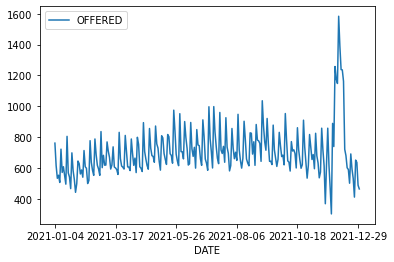

In [186]:
# plot offered calls by date
year.plot(y=["OFFERED"])

In [199]:
# filter data to exclude outlier of dates with abnormal call volume
refined_df = clean_historical_df.loc[(clean_historical_df["DATE"] < "2021-11-16")]

In [200]:
# group by filtered dates
year = pd.DataFrame(refined_df.groupby("DATE").sum()[["Answered", 'OFFERED']])

<AxesSubplot:xlabel='DATE'>

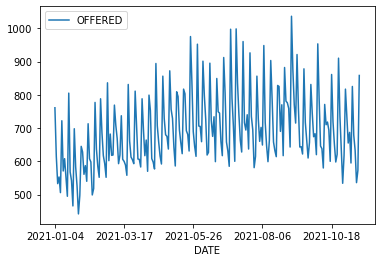

In [201]:
# plot filtered dates
year.plot(y=["OFFERED"])

In [202]:
# export filtered data 
refined_df.to_csv("Clean_Data/Analysis_ready_Call_Type_Historical_2021", index=False)